![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Graded Assignment: Machine Learning
### Lenin Escobar - Real-time Data Analysis
Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lveagithub/bts-advanced-data-analysis-2020/blob/master/Assigments/AssociationRulesForMarketBasketAnalysis/AssociationRulesForMarketBasketAnalysis.ipynb)

<h1 style="background-color:powderblue;">Setting Virtual Env</h1>

In [0]:
#General
import sys
import os
import subprocess
import time
import random
import numpy as np
#from math import log

#Plotting
import matplotlib.pyplot as plt

#Pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import *
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.stat import Correlation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit
#from pyspark.sql.functions import isnan, when, count, col, row_number, regexp_extract, regexp_replace, trim, split, to_timestamp, date_format
#from pyspark.sql.types import StructType, StructField, LongType, StringType, TimestampType, IntegerType

In [0]:
class CustomEnv():
  """Custom environment definition class"""
  def __init__(self, virtual_env_dir = "python-virtual-environments"):
    self.virtual_env_dir = virtual_env_dir
  def in_virtualenv(self):
    is_venv = False
    if ( hasattr(sys, 'prefix') and hasattr(sys, 'base_prefix') ):
      if (sys.prefix != sys.base_prefix):
        if ( os.path.exists(self.virtual_env_dir ) ):
          is_venv = True
    return is_venv
  def exec_shell_cmd(self, prg_name, prg_args):
    command = [prg_name]
    command.extend(prg_args)
    output = subprocess.Popen(command, stdout=subprocess.PIPE).communicate()[0]
    return output
  def create_minimum_venv(self):
    try:
      if self.in_virtualenv() == False:
        #Upgradig pip first
        print("cmd_1")
        prg_name = "pip"
        prg_args = ["install --upgrade", "pip"]
        cmd_output = self.exec_shell_cmd(prg_name, prg_args)
        print(cmd_output)
        #Installing venv
        print("cmd_2")
        prg_name = "pip"
        prg_args = ["install", "virtualenv"]
        cmd_output = self.exec_shell_cmd(prg_name, prg_args)
        print(cmd_output)
        #Creating directory
        print("cmd_3")
        prg_name = "mkdir"
        prg_args = ["python-virtual-environments"]
        cmd_output = self.exec_shell_cmd(prg_name, prg_args)
        print(cmd_output)
        #Creating venv
        print("cmd_4")
        command = "cd python-virtual-environments && python3 -m venv env"
        process = subprocess.run(command, capture_output=True, shell=True)
        print(process.stdout.decode())
        #Activating venv
        #print("cmd_5")
        #command = "source python-virtual-environments/env/bin/activate"
        #process = subprocess.run(command, capture_output=True, shell=True)
        #print(process.stdout.decode())
        #Installing Google libs
        #print("cmd_6")
        #command = "pip install --upgrade", "google-api-python-client google-auth-httplib2 google-auth-oauthlib"
        #process = subprocess.run(command, capture_output=True, shell=True)
        #print(process.stdout.decode())
    except Exception as e:
      return 'Error:' + str(e)
    finally:
      return "Done"


In [0]:
customEnv = CustomEnv()
customEnv.create_minimum_venv()

cmd_1
b''
cmd_2
b'Requirement already satisfied: virtualenv in /usr/local/lib/python3.8/site-packages (20.2.1)\nRequirement already satisfied: appdirs<2,>=1.4.3 in /usr/local/lib/python3.8/site-packages (from virtualenv) (1.4.4)\nRequirement already satisfied: six<2,>=1.9.0 in /usr/local/lib/python3.8/site-packages (from virtualenv) (1.15.0)\nRequirement already satisfied: filelock<4,>=3.0.0 in /usr/local/lib/python3.8/site-packages (from virtualenv) (3.0.12)\nRequirement already satisfied: distlib<1,>=0.3.1 in /usr/local/lib/python3.8/site-packages (from virtualenv) (0.3.1)\n'
cmd_3
b''
cmd_4

Out[3]: 'Done'

In [0]:
!source python-virtual-environments/env/bin/activate

In [0]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Collecting google-api-python-client
 Downloading google_api_python_client-2.9.0-py2.py3-none-any.whl (7.0 MB)
 | 10 kB 22.3 MB/s eta 0:00:01 | | 20 kB 26.2 MB/s eta 0:00:01 |▏ | 30 kB 29.7 MB/s eta 0:00:01 |▏ | 40 kB 32.7 MB/s eta 0:00:01 |▎ | 51 kB 28.2 MB/s eta 0:00:01 |▎ | 61 kB 19.8 MB/s eta 0:00:01 |▎ | 71 kB 21.2 MB/s eta 0:00:01 |▍ | 81 kB 19.2 MB/s eta 0:00:01 |▍ | 92 kB 18.0 MB/s eta 0:00:01 |▌ | 102 kB 18.5 MB/s eta 0:00:01 |▌ | 112 kB 18.5 MB/s eta 0:00:01 |▋ | 122 kB 18.5 MB/s eta 0:00:01 |▋ | 133 kB 18.5 MB/s eta 0:00:01 |▋ | 143 kB 18.5 MB/s eta 0:00:01 |▊ | 153 kB 18.5 MB/s eta 0:00:01 |▊ | 163 kB 18.5 MB/s eta 0:00:01 |▉ | 174 kB 18.5 MB/s eta 0:00:01 |▉ | 184 kB 18.5 MB/s eta 0:00:01 |█ | 194 kB 18.5 MB/s eta 0:00:01 |█ | 204 kB 18.5 MB/s eta 0:00:01 |█ | 215 kB 18.5 MB/s eta 0:00:01 |█ | 225 kB 18.5 MB/s eta 0:00:01 |█ | 235 kB 18.5 MB/s eta 0:00:01 |█▏ | 245 kB 18.5 MB/s eta 0:00:01 |█▏ | 256 kB 18.5 MB/s eta 0:00:01 |█▏ | 266 kB 18.5 MB/s eta 0:00:01 |█▎ | 276 kB 18.5 MB/s eta 0:00:01 |█▎ | 286 kB 18.5 MB/s eta 0:00:01 |█▍ | 296 kB 18.5 MB/s eta 0:00:01 |█▍ | 307 kB 18.5 MB/s eta 0:00:01 |█▌ | 317 kB 18.5 MB/s eta 0:00:01 |█▌ | 327 kB 18.5 MB/s eta 0:00:01 |█▌ | 337 kB 18.5 MB/s eta 0:00:01 |█▋ | 348 kB 18.5 MB/s eta 0:00:01 |█▋ | 358 kB 18.5 MB/s eta 0:00:01 |█▊ | 368 kB 18.5 MB/s eta 0:00:01 |█▊ | 378 kB 18.5 MB/s eta 0:00:01 |█▉ | 389 kB 18.5 MB/s eta 0:00:01 |█▉ | 399 kB 18.5 MB/s eta 0:00:01 |█▉ | 409 kB 18.5 MB/s eta 0:00:01 |██ | 419 kB 18.5 MB/s eta 0:00:01 |██ | 430 kB 18.5 MB/s eta 0:00:01 |██ | 440 kB 18.5 MB/s eta 0:00:01 |██ | 450 kB 18.5 MB/s eta 0:00:01 |██ | 460 kB 18.5 MB/s eta 0:00:01 |██▏ | 471 kB 18.5 MB/s eta 0:00:01 |██▏ | 481 kB 18.5 MB/s eta 0:00:01 |██▎ | 491 kB 18.5 MB/s eta 0:00:01 |██▎ | 501 kB 18.5 MB/s eta 0:00:01 |██▍ | 512 kB 18.5 MB/s eta 0:00:01 |██▍ | 522 kB 18.5 MB/s eta 0:00:01 |██▍ | 532 kB 18.5 MB/s eta 0:00:01 |██▌ | 542 kB 18.5 MB/s eta 0:00:01 |██▌ | 552 kB 18.5 MB/s eta 0:00:01 |██▋ | 563 kB 18.5 MB/s eta 0:00:01 |██▋ | 573 kB 18.5 MB/s eta 0:00:01 |██▊ | 583 kB 18.5 MB/s eta 0:00:01 |██▊ | 593 kB 18.5 MB/s eta 0:00:01 |██▊ | 604 kB 18.5 MB/s eta 0:00:01 |██▉ | 614 kB 18.5 MB/s eta 0:00:01 |██▉ | 624 kB 18.5 MB/s eta 0:00:01 |███ | 634 kB 18.5 MB/s eta 0:00:01 |███ | 645 kB 18.5 MB/s eta 0:00:01 |███ | 655 kB 18.5 MB/s eta 0:00:01 |███ | 665 kB 18.5 MB/s eta 0:00:01 |███ | 675 kB 18.5 MB/s eta 0:00:01 |███▏ | 686 kB 18.5 MB/s eta 0:00:01 |███▏ | 696 kB 18.5 MB/s eta 0:00:01 |███▎ | 706 kB 18.5 MB/s eta 0:00:01 |███▎ | 716 kB 18.5 MB/s eta 0:00:01 |███▎ | 727 kB 18.5 MB/s eta 0:00:01 |███▍ | 737 kB 18.5 MB/s eta 0:00:01 |███▍ | 747 kB 18.5 MB/s eta 0:00:01 |███▌ | 757 kB 18.5 MB/s eta 0:00:01 |███▌ | 768 kB 18.5 MB/s eta 0:00:01 |███▋ | 778 kB 18.5 MB/s eta 0:00:01 |███▋ | 788 kB 18.5 MB/s eta 0:00:01 |███▋ | 798 kB 18.5 MB/s eta 0:00:01 |███▊ | 808 kB 18.5 MB/s eta 0:00:01 |███▊ | 819 kB 18.5 MB/s eta 0:00:01 |███▉ | 829 kB 18.5 MB/s eta 0:00:01 |███▉ | 839 kB 18.5 MB/s eta 0:00:01 |████ | 849 kB 18.5 MB/s eta 0:00:01 |████ | 860 kB 18.5 MB/s eta 0:00:01 |████ | 870 kB 18.5 MB/s eta 0:00:01 |████ | 880 kB 18.5 MB/s eta 0:00:01 |████ | 890 kB 18.5 MB/s eta 0:00:01 |████▏ | 901 kB 18.5 MB/s eta 0:00:01 |████▏ | 911 kB 18.5 MB/s eta 0:00:01 |████▏ | 921 kB 18.5 MB/s eta 0:00:01 |████▎ | 931 kB 18.5 MB/s eta 0:00:01 |████▎ | 942 kB 18.5 MB/s eta 0:00:01 |████▍ | 952 kB 18.5 MB/s eta 0:00:01 |████▍ | 962 kB 18.5 MB/s eta 0:00:01 |████▌ | 972 kB 18.5 MB/s eta 0:00:01 |████▌ | 983 kB 18.5 MB/s eta 0:00:01 |████▌ | 993 kB 18.5 MB/s eta 0:00:01 |████▋ | 1.0 MB 18.5 MB/s eta 0:00:01 |████▋ | 1.0 MB 18.5 MB/s eta 0:00:01 |████▊ | 1.0 MB 18.5 MB/s eta 0:00:01 |████▊ | 1.0 MB 18.5 MB/s eta 0:00:01 |████▉ | 1.0 MB 18.5 MB/s eta 0:00:01 |████▉ | 1.1 MB 18.5 MB/s eta 0:00:01 |████▉ | 1.1 MB 18.5 MB/s eta 0:00:01 |█████ | 1.1 MB 18.5 MB/s eta 0:00:01 |█████ | 1.1 MB 18.5 MB/s 

<h1 style="background-color:powderblue;">Google drive Conn Class</h1>

In [0]:
# According to Github best practices 
# (https://docs.github.com/en/github/managing-large-files/working-with-large-files): 
# GitHub limits the size of files allowed in repositories, 
# and will block a push to a repository if the files are larger than the maximum file limit.
# So, I better use google drive for these cases 
# Plus, I'm working on databrick community edition. So, I cannot use API Token (just to use something like s3)

In [0]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2 import service_account
import io
import os
import sys
from IPython.utils.capture import CapturedIO
from enum import Enum

In [0]:
class Environments(Enum):
  """Environments Enum"""
  UNDEFINED = 0
  LOCAL = 1
  DATABRICKS = 2

In [0]:
class ConfEnvironment(Enum):
  """Conf_Environments Enum"""
  PENDING = 0
  READY = 1

In [0]:
class FSManagement():
    """File system management class"""
    def __init__(self, 
                 path_authentication_dbfs_dir="dbfs:/FileStore/Authentication",
                 path_data_dbfs_dir="dbfs:/FileStore/Data",
                 path_authentication_dbfs_file="dbfs:/FileStore/python_service.json",
                 path_authentication_dir="file:/dbfs/FileStore/Authentication",
                 path_data_dir="file:/dbfs/FileStore/Data"):
      self.environment = Environments.LOCAL.value # Current environment
      self.conf_df_env = ConfEnvironment.PENDING.value #Conf environment
      self.path_authentication_dbfs_dir = path_authentication_dbfs_dir # path_authentication_dbfs_dir
      self.path_data_dbfs_dir = path_data_dbfs_dir # path_data_dbfs_dir
      self.path_authentication_dbfs_file = path_authentication_dbfs_file # path_authentication_file
      self.path_authentication_dir = path_authentication_dir # path_authentication_dir
      self.path_data_dir = path_data_dir # path_authentication_dir
    def is_running_in_databricks(self):
      return (Environments.DATABRICKS.value if os.environ.get('SPARK_ENV_LOADED') else Environments.LOCAL.value)
    def conf_fs_environment(self):
      if self.is_running_in_databricks():
        if self.conf_df_env == ConfEnvironment.PENDING.value:
          try:
            #Creating directories in default storage (root) DBDF
            dbutils.fs.mkdirs(self.path_authentication_dbfs_dir)
            dbutils.fs.mkdirs(self.path_data_dbfs_dir)
            #Creating directories in default local storage (filesystem)
            dbutils.fs.mkdirs(self.path_authentication_dir)
            dbutils.fs.mkdirs(self.path_data_dir)
            #Moving files where can be accesed from: DBDF to local storage
            dbutils.fs.mv(self.path_authentication_dbfs_file, self.path_authentication_dir)
          except Exception as e:
            return 'Error:' + str(e)
          finally:
            self.conf_df_env = ConfEnvironment.READY.value
      else:
        #Safely create directories
        if not os.path.exists(self.path_data_dbfs_dir):
            os.makedirs(self.path_data_dbfs_dir)

        if not os.path.exists(self.path_authentication_dbfs_dir):
            os.makedirs(self.path_authentication_dbfs_dir)
            
        self.conf_df_env = ConfEnvironment.READY.value

In [0]:
fs_management = FSManagement(path_authentication_dbfs_dir="dbfs:/FileStore/Authentication",
                             path_data_dbfs_dir="dbfs:/FileStore/Data",
                             path_authentication_dbfs_file="dbfs:/FileStore/python_service.json",
                             path_authentication_dir="file:/dbfs/FileStore/Authentication",
                             path_data_dir="file:/dbfs/FileStore/Data")
fs_management.conf_fs_environment()

In [0]:
class GoogleDriveFiles():
    """Custom Google Drive Class"""
    def __init__(self, credentials_file_name):
        #https://console.cloud.google.com/iam-admin/serviceaccounts/details/113530738473514992506/keys?project=feisty-dolphin-313318
        #https://console.cloud.google.com/apis/credentials?organizationId=0&project=feisty-dolphin-313318&supportedpurview=project
        #https://console.cloud.google.com/apis/library/drive.googleapis.com?project=feisty-dolphin-313318
        self.credentials_file_name = credentials_file_name # Credentials compatible with this API
        print(self.credentials_file_name)
        #service_account.Credentials.from_service_account_file()
        self.credentials = service_account.Credentials.from_service_account_file(self.credentials_file_name) # Global Service Account Credentials
    def download_file_from_gdrive(self,file_id, downloaded_file_name, verbose = False):
        """Get credentials from file
        :return:boolean
        """
        drive_service = build('drive', 'v3', credentials=self.credentials)

        request = drive_service.files().get_media(fileId=file_id)
        #fh = io.BytesIO() # this can be used to keep in memory
        fh = io.FileIO(downloaded_file_name, 'wb') # this can be used to write to disk
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()
            if verbose:
                print (f'%{int(status.progress() * 100)} downloaded file: {downloaded_file_name}')
                #print("Download %d%%." % int(status.progress() * 100)) 
        return done

In [0]:
#Google Drive- File

#Initializing Class
#google_drive = GoogleDriveFiles("dbfs:/FileStore/Authentication/python_service.json")
google_drive = GoogleDriveFiles("/dbfs/FileStore/Authentication/python_service.json")

#Downloading feature.name"
file_id = '1wNQXEkJl_CaYNk0Hl_gKaKP71Rsle3h7'
file_path = "/dbfs/FileStore/Data/feature.name"
download_status = google_drive.download_file_from_gdrive(file_id, file_path, verbose = True)
print(download_status)

#Downloading test.data"
file_id = '1F5x1y1ulpII1Zb96p76NwPtg7EppxOhV'
file_path = "/dbfs/FileStore/Data/test.data"
download_status = google_drive.download_file_from_gdrive(file_id, file_path, verbose = True)
print(download_status)

#Downloading train.data"
file_id = '1ZIoE3DU1_NxqIemHpwfr4vYJeaw9j7iB'
file_path = "/dbfs/FileStore/Data/train.data"
download_status = google_drive.download_file_from_gdrive(file_id, file_path, verbose = True)
print(download_status)

#Downloading train.solution"
file_id = '1aoY92XlzY7TkX9GGtSwY2TlEXgzucdxj'
file_path = "/dbfs/FileStore/Data/train.solution"
download_status = google_drive.download_file_from_gdrive(file_id, file_path, verbose = True)
print(download_status)

#Downloading validation.data"
file_id = '1989M5OYFs7wb-YG3XQSFDlKVgHV-uJGT'
file_path = "/dbfs/FileStore/Data/validation.data"
download_status = google_drive.download_file_from_gdrive(file_id, file_path, verbose = True)
print(download_status)

/dbfs/FileStore/Authentication/python_service.json
%100 downloaded file: /dbfs/FileStore/Data/feature.name
True
%51 downloaded file: /dbfs/FileStore/Data/test.data
%100 downloaded file: /dbfs/FileStore/Data/test.data
True
%5 downloaded file: /dbfs/FileStore/Data/train.data
%11 downloaded file: /dbfs/FileStore/Data/train.data
%17 downloaded file: /dbfs/FileStore/Data/train.data
%22 downloaded file: /dbfs/FileStore/Data/train.data
%28 downloaded file: /dbfs/FileStore/Data/train.data
%34 downloaded file: /dbfs/FileStore/Data/train.data
%39 downloaded file: /dbfs/FileStore/Data/train.data
%45 downloaded file: /dbfs/FileStore/Data/train.data
%51 downloaded file: /dbfs/FileStore/Data/train.data
%56 downloaded file: /dbfs/FileStore/Data/train.data
%62 downloaded file: /dbfs/FileStore/Data/train.data
%68 downloaded file: /dbfs/FileStore/Data/train.data
%73 downloaded file: /dbfs/FileStore/Data/train.data
%79 downloaded file: /dbfs/FileStore/Data/train.data
%85 downloaded file: /dbfs/FileStore/Data/train.data
%90 downloaded file: /dbfs/FileStore/Data/train.data
%96 downloaded file: /dbfs/FileStore/Data/train.data
%100 downloaded file: /dbfs/FileStore/Data/train.data
True
%100 downloaded file: /dbfs/FileStore/Data/train.solution
True
%47 downloaded file: /dbfs/FileStore/Data/validation.data
%94 downloaded file: /dbfs/FileStore/Data/validation.data
%100 downloaded file: /dbfs/FileStore/Data/validation.data
True

<h5 style="background-color:blue;">Reading pre-downloaded files</h5>

In [0]:
os.listdir("/dbfs/FileStore/Data/")

Out[14]: ['feature.name',
 'test.data',
 'train-data.parquet',
 'train-solution.parquet',
 'train.data',
 'train.solution',
 'validation.data']

In [0]:
!cat /dbfs/FileStore/Data/feature.name

tweet_id	username	timestamp	#followers	#friends	#favorites	entities	sentiment	mentions	hashtags	urls

In [0]:
!head -5 /dbfs/FileStore/Data/train.data

1178791787386814465	35234fe4a19cc1a3336095fb3780bcc1	Mon Sep 30 22:00:37 +0000 2019	619	770	0	null;	2 -1	null;	null;	null;
1178791985106153472	ea4592f39636d87af8fb4b17b7e2e4c0	Mon Sep 30 22:01:24 +0000 2019	36365	19344	17	nazi:Nazism:-2.742538749414189;blood money:Blood_money_%28restitution%29:-2.9575566132167106;	1 -4	null;	null;	https://twitter.com/himalayahawk/status/1177665407555125248?s=21:-:
1178793230223183872	bf05d1888dd974fa4a8679c25e2ead03	Mon Sep 30 22:06:21 +0000 2019	5018	1933	0	vaccine:Vaccine:-2.6651530673745762;anti vaxxer:Vaccine_hesitancy:-2.7801236851138458;blog:Blog:-2.8453634473716223;	2 -1	null;	null;	https://goo.gl/fb/uoeiPk:-:
1178795172206919680	eb8a99bca8945eab1d006750e9b75518	Mon Sep 30 22:14:04 +0000 2019	2219	971	0	muse:Muse_%28band%29:-2.1677823918620867;talking to you:Talking_to_You:-2.7586709786998473;	2 -1	null;	null;	null;
1178798309491822592	00695cf79d60e86a5d0f872f4358337a	Mon Sep 30 22:26:32 +0000 2019	9009	4943	89	people of northern ireland:People_of_Northern_Ireland:-2.3069923615516066;vfs:Virtual_file_system:-2.9385834412835745;	2 -1	null;	VFS	null;

In [0]:
!head -5 /dbfs/FileStore/Data/train.solution

0
13
0
0
26

In [0]:
!head -5 /dbfs/FileStore/Data/test.data

da3b8dc3ce1ef34c764123f0d5354441	Wed May 06 16:58:11 +0000 2020	705	902	0	adele:Adele:-1.655406490639192;	3 -1	null;	null;	null;
c220553a396ccf912542731461f5293d	Sun May 17 18:35:03 +0000 2020	573	272	1	frontline:Frontline_%28American_TV_program%29:-2.286891746371709;	3 -1	MeerFoundation teamsrkfc	DonateToMeer	null;
8564c6b01401a7a43be4c67a664262fc	Wed May 13 19:00:48 +0000 2020	1864	546	0	morning dress:Morning_dress:-1.1825151103915983;	1 -1	carryonkeith	null;	null;
70fee79e51b058dfe2ff1bd3d933a357	Sat May 23 13:27:32 +0000 2020	10	39	0	fy:Fiscal_year:-2.004024336573943;china:China:-2.113921624336916;	2 -1	dbongino	null;	null;
ff7b841daf4fb550db090ba06f4a04c0	Tue May 19 00:09:07 +0000 2020	46	3	0	null;	1 -1	null;	null;	null;

<h5 style="background-color:blue;">Preprocessing</h5>

In [0]:
class Timer():
  """Custom Timer Class"""
  def __init__(self):
    self._start_time = None
    self._id = None
  def start(self, _id):
    """Start a new timer"""
    if self._start_time is not None:
      raise TimerError(f"Timer is running. Use .stop() to stop it, so you can use it this process:{self._id}")
    self._start_time = time.perf_counter()
  def stop(self, _id):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it, so you can use it this process:{self._id}")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Process {self._id} elapsed time: {elapsed_time:0.4f} seconds")

In [0]:
#Testind Timer Class
#t = Timer()
#t.start(_id = "random")
#lst_test = []
#for i in range(0,100):
#  x = random.randint(1,10)
#  lst_test.append(x)
#t.stop(_id = "random")

In [0]:
#I decided to work with Spark dataframes based on parquet files instead of CSV
class Ingestion():
    """Custom Ingestion Class"""
    def __init__(self, 
                 csv_file_path = "file:/dbfs/FileStore/Data/", 
                 parquet_file_path = "dbfs:/FileStore/Data/"):
        self.csv_file_path = csv_file_path
        self.parquet_file_path = parquet_file_path
    def parquet_file_exists(self, file_name):
        """Check if parquet file exists
        :return:list_len
        """
        lst_len = 0
        try:
          lst_len = len(dbutils.fs.ls(self.parquet_file_path + file_name))
        except:
          print("Parquet file already exists!")
          return lst_len
        finally:
          return lst_len
    def parquet_file_del(self, file_name):
        """Delete file parquet exists
        :return:boolean
        """
        try:
          dbutils.fs.rm(self.parquet_file_path + file_name, recurse = True)
        except:
          print("Something wrong happened!")
          return False
        finally:
          return True
    def df_from_csv(self, file_name, schema):
        """Get dataframe from csv file
        :return:dataframe
        """
        input_file = self.csv_file_path + file_name
        df = spark.read.schema(schema) \
            .option("header", "false") \
            .option("delimiter", "\t") \
            .csv(input_file)
        return df

    def df_to_parquet(self, df, file_name):
        """Dataframe to parquet
        :return:output_file
        """
        output_file = self.parquet_file_path + file_name
        df.write.parquet(output_file)
        return output_file

    def df_from_parquet(self, _file):
        """Dataframe from parquet
        :return:dataframe
        """
        df = spark.read.parquet(_file)
        return df
    def join_train_db(self,df_train_data,df_train_solution):
        """Join two special Train dataframes
        :return:dataframe
        """
        #Creating Rownumber column just to join the two dataframes
        window=Window.orderBy(lit(1))

        df_tmp_data=df_train_data.withColumn("rownumber",row_number().over(window)-1)
        df_tmp_solution=df_train_solution.withColumn("rownumber",row_number().over(window)-1)
        df_train_data_joined = df_tmp_data.join(df_tmp_solution,["rownumber"]).drop("rownumber")
        return df_train_data_joined

In [0]:
#Read train.data file into Dataframe
ingestion = Ingestion()
csv_file_name = "train.data"
parquet_file_name = "train-data.parquet"

_continue = False
if ingestion.parquet_file_exists(file_name=parquet_file_name) > 0:
  if ingestion.parquet_file_del(file_name=parquet_file_name):
    _continue = True
else:
  _continue = True

if _continue:
  schema = StructType([
      StructField(name = "tweet_id", dataType = LongType(), nullable = False),
      StructField(name = "username", dataType = StringType(), nullable = False),
      StructField(name = "timestamp", dataType = StringType(), nullable = False),
      StructField(name = "#followers", dataType = IntegerType(), nullable = True),
      StructField(name = "#friends", dataType = IntegerType(), nullable = True),
      StructField(name = "#favorites", dataType = IntegerType(), nullable = True),
      StructField(name = "entities", dataType = StringType(), nullable = True),
      StructField(name = "sentiment", dataType = StringType(), nullable = True),
      StructField(name = "mentions", dataType = StringType(), nullable = True),
      StructField(name = "hashtags", dataType = StringType(), nullable = True),
      StructField(name = "urls", dataType = StringType(), nullable = True)
  ])
  t = Timer()
  t.start(_id="train.data_start_df_from_csv")
  df_from_csv = ingestion.df_from_csv(file_name=csv_file_name, schema=schema)
  t.stop(_id="train.data_stop_df_from_csv")
  t.start(_id="train.data_start_df_to_parquet")
  parquet_file = ingestion.df_to_parquet(df = df_from_csv, file_name = parquet_file_name)
  t.stop(_id="train.data_stop_df_to_parquet")
  t.start(_id="train.data_start_df_from_parquet")
  df_train_data = ingestion.df_from_parquet(_file = parquet_file)
  t.stop(_id="train.data_start_df_from_parquet")

Process None elapsed time: 0.9431 seconds
Process None elapsed time: 46.6997 seconds
Process None elapsed time: 1.2646 seconds

In [0]:
#Read train.solution file into Dataframe
ingestion = Ingestion()
csv_file_name = "train.solution"
parquet_file_name = "train-solution.parquet"

_continue = False
if ingestion.parquet_file_exists(file_name=parquet_file_name) > 0:
  if ingestion.parquet_file_del(file_name=parquet_file_name):
    _continue = True
else:
  _continue = True

if _continue:
  schema = StructType([
      StructField(name = "tweet_number", dataType = IntegerType(), nullable = False)
  ])
  t = Timer()
  t.start(_id="train.solution_start_df_from_csv")
  df_from_csv = ingestion.df_from_csv(file_name=csv_file_name, schema=schema)
  t.stop(_id="train.solution_stop_df_from_csv")
  t.start(_id="train.solution_start_df_to_parquet")
  parquet_file = ingestion.df_to_parquet(df = df_from_csv, file_name = parquet_file_name)
  t.stop(_id="train.solution_stop_df_to_parquet")
  t.start(_id="train.solution_start_df_from_parquet")
  df_train_solution = ingestion.df_from_parquet(_file = parquet_file)
  t.stop(_id="train.solution_start_df_from_parquet")

Process None elapsed time: 0.2204 seconds
Process None elapsed time: 3.3069 seconds
Process None elapsed time: 0.5949 seconds

In [0]:
df_train_data.filter( col("tweet_id") == 1178798309491822592).show(n=5, vertical=False, truncate = False)

+-------------------+--------------------------------+------------------------------+----------+--------+----------+----------------------------------------------------------------------------------------------------------------------+---------+--------+--------+-----+
tweet_id |username |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions|hashtags|urls |
+-------------------+--------------------------------+------------------------------+----------+--------+----------+----------------------------------------------------------------------------------------------------------------------+---------+--------+--------+-----+
1178798309491822592|00695cf79d60e86a5d0f872f4358337a|Mon Sep 30 22:26:32 +0000 2019|9009 |4943 |89 |people of northern ireland:People_of_Northern_Ireland:-2.3069923615516066;vfs:Virtual_file_system:-2.9385834412835745;|2 -1 |null; |VFS |null;|
+-------------------+--------------------------------+------------------------------+----------+--------+----------+----------------------------------------------------------------------------------------------------------------------+---------+--------+--------+-----+

In [0]:
df_train_solution.show(n=5, vertical=False, truncate = False)

+------------+
tweet_number|
+------------+
0 |
0 |
172 |
0 |
0 |
+------------+
only showing top 5 rows

In [0]:
print(df_train_data.count(), df_train_solution.count())

8151524 8151524

In [0]:
df_train_data_joined = ingestion.join_train_db(df_train_data=df_train_data,df_train_solution=df_train_solution)

In [0]:
df_train_data_joined.show(n=5, vertical=False, truncate = False)

+-------------------+--------------------------------+------------------------------+----------+--------+----------+----------------------------------------------------------------------------------------------------------------------+---------+--------+--------+-------------------------------------------------------------------+------------+
tweet_id |username |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions|hashtags|urls |tweet_number|
+-------------------+--------------------------------+------------------------------+----------+--------+----------+----------------------------------------------------------------------------------------------------------------------+---------+--------+--------+-------------------------------------------------------------------+------------+
1178791787386814465|35234fe4a19cc1a3336095fb3780bcc1|Mon Sep 30 22:00:37 +0000 2019|619 |770 |0 |null; |2 -1 |null; |null; |null; |0 |
1178791985106153472|ea4592f39636d87af8fb4b17b7e2e4c0|Mon Sep 30 22:01:24 +0000 2019|36365 |19344 |17 |nazi:Nazism:-2.742538749414189;blood money:Blood_money_%28restitution%29:-2.9575566132167106; |1 -4 |null; |null; |https://twitter.com/himalayahawk/status/1177665407555125248?s=21:-:|0 |
1178793230223183872|bf05d1888dd974fa4a8679c25e2ead03|Mon Sep 30 22:06:21 +0000 2019|5018 |1933 |0 |vaccine:Vaccine:-2.6651530673745762;anti vaxxer:Vaccine_hesitancy:-2.7801236851138458;blog:Blog:-2.8453634473716223; |2 -1 |null; |null; |https://goo.gl/fb/uoeiPk:-: |172 |
1178795172206919680|eb8a99bca8945eab1d006750e9b75518|Mon Sep 30 22:14:04 +0000 2019|2219 |971 |0 |muse:Muse_%28band%29:-2.1677823918620867;talking to you:Talking_to_You:-2.7586709786998473; |2 -1 |null; |null; |null; |0 |
1178798309491822592|00695cf79d60e86a5d0f872f4358337a|Mon Sep 30 22:26:32 +0000 2019|9009 |4943 |89 |people of northern ireland:People_of_Northern_Ireland:-2.3069923615516066;vfs:Virtual_file_system:-2.9385834412835745;|2 -1 |null; |VFS |null; |0 |
+-------------------+--------------------------------+------------------------------+----------+--------+----------+----------------------------------------------------------------------------------------------------------------------+---------+--------+--------+-------------------------------------------------------------------+------------+
only showing top 5 rows

In [0]:
print(df_train_data_joined.count())

8151524

In [0]:
#Converting timestamp col type from string to timestamp
df_train_data_joined = df_train_data_joined.withColumn("timestamp", to_timestamp(substring("timestamp", 5, 30), "MMM dd HH:mm:ss Z yyyy") )

In [0]:
#Splitting original sentiment col
df_train_data_joined = df_train_data_joined.withColumn('pos_sentiment', split(df_train_data_joined['sentiment'], ' ').getItem(0)) \
       .withColumn('neg_sentiment', split(df_train_data_joined['sentiment'], ' ').getItem(1))
df_train_data_joined = df_train_data_joined.withColumn("pos_sentiment", df_train_data_joined["pos_sentiment"].cast(IntegerType()))
df_train_data_joined = df_train_data_joined.withColumn("neg_sentiment", df_train_data_joined["neg_sentiment"].cast(IntegerType()))

In [0]:
df_train_data_joined.show(n=5, vertical=False, truncate = False)

+-------------------+--------------------------------+-------------------+----------+--------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+-------------------------------------------------------------------------------------------------+------------+-------------+-------------+
tweet_id |username |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags |urls |tweet_number|pos_sentiment|neg_sentiment|
+-------------------+--------------------------------+-------------------+----------+--------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+-------------------------------------------------------------------------------------------------+------------+-------------+-------------+
1181709712552873985|446114005ccf4c7c37b3d2105ef22e61|2019-10-08 23:15:25|12549 |230 |100 |null; |1 -1 |peppercoyote |null; |null; |18 |1 |-1 |
1181710326703804421|791b736202c4adc54413784d48db7ede|2019-10-08 23:17:51|7039 |606 |0 |null; |2 -2 |null; |null; |null; |29 |2 |-2 |
1181711851807227904|be4f362c2f07b85eff302df5cd776825|2019-10-08 23:23:55|55020 |999 |21 |wesley snipes:Wesley_Snipes:-0.7199943423578707;blade ii:Blade_II:-1.1381024356240304;surreal:Surrealism:-2.8785571123621603;coming out:Coming_out:-2.9597412899732403;|3 -1 |KeeganMKey wesleysnipes|null; |null; |3 |3 |-1 |
1181713486172364802|046e1cec79cb1f82c42b5cefc6b24c77|2019-10-08 23:30:24|6251 |6215 |1 |lnp:Liberal_National_Party_of_Queensland:-1.580205394621997; |2 -1 |Zanukah |auspol Corruption LNP|null; |2 |2 |-1 |
1181715137570455554|38df6af56a586dc09621b73dc9619c7d|2019-10-08 23:36:58|718 |4587 |0 |china trade:Old_China_Trade:-2.8376481917401395; |1 -3 |null; |null; |http://noahblaine.com/2019/10/08/us-indexes-close-lower-tuesday-with-new-china-trade-tensions/:-:|3 |1 |-3 |
+-------------------+--------------------------------+-------------------+----------+--------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------------------+---------------------+-------------------------------------------------------------------------------------------------+------------+-------------+-------------+
only showing top 5 rows

In [0]:
df_train_data_joined.dtypes

Out[33]: [('tweet_id', 'bigint'),
 ('username', 'string'),
 ('timestamp', 'timestamp'),
 ('#followers', 'int'),
 ('#friends', 'int'),
 ('#favorites', 'int'),
 ('entities', 'string'),
 ('sentiment', 'string'),
 ('mentions', 'string'),
 ('hashtags', 'string'),
 ('urls', 'string'),
 ('tweet_number', 'int'),
 ('pos_sentiment', 'int'),
 ('neg_sentiment', 'int')]

In [0]:
#df_train_data_joined.select("#Followers", "#Friends").show(n=5, vertical=False, truncate = False)

<h5 style="background-color:blue;">Feature engineering</h5>

In [0]:
#df_train_data_feat_eng =  df_train_data_joined.withColumn("date_tweet", to_date(col("timestamp") ) ) 
df_train_fe =  df_train_data_joined

In [0]:
df_train_fe_tweets_date =  df_train_fe.groupBy(to_date(col("timestamp")).alias("date_tweet")).count().select( "date_tweet", col("count").alias("count")).orderBy("count",ascending=False)

In [0]:
df_train_fe_tweets_date_usr =  df_train_fe.groupBy(to_date(col("timestamp")).alias("date_tweet"), col("username")).count().select( "date_tweet", "username", col("count").alias("count")).orderBy("username", "count", ascending=False)

In [0]:
display(df_train_fe_tweets_date)

date_tweet,count
2020-03-23,128406
2020-03-24,127560
2020-03-22,120388
2020-03-19,119434
2020-03-26,118610
2020-03-27,117949
2020-03-25,117933
2020-03-20,116509
2020-03-18,116341
2020-03-17,114492


In [0]:
df_train_fe_tweets_date.show(n=5, vertical=False, truncate = False)

+----------+------+
date_tweet|count |
+----------+------+
2020-03-23|128406|
2020-03-24|127560|
2020-03-22|120388|
2020-03-19|119434|
2020-03-26|118610|
+----------+------+
only showing top 5 rows

In [0]:
#Casting BigInt to Int
#df_train_fe_tweets_date = df_train_fe_tweets_date.withColumn("count", df_train_fe_tweets_date["count"].cast(LongType()))
#df_train_fe_tweets_date.withColumn( "count", col("count").cast("integer") )

In [0]:
df_train_fe_tweets_date.printSchema()

root
-- date_tweet: date (nullable = true)
-- count: long (nullable = false)

In [0]:
class Tranformation():
  """Custom tranformation Class"""
  def __init__(self):
    print("init")
  def trans_MinMaxScaler(self, df, cols):
    """Transform cols using MinMaxScaler
    :return:dataframe
    """
    # UDF for converting column type from vector to double type
    unlist = udf(lambda v: float(v[0]),FloatType())

    # Iterating over columns to be scaled
    for i in cols:
      # VectorAssembler Transformation - Converting column to vector type
      assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

      # MinMaxScaler Transformation
      scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

      # Pipeline of VectorAssembler and MinMaxScaler
      pipeline = Pipeline(stages=[assembler, scaler])

      # Fitting pipeline on dataframe
      df = pipeline.fit(df).transform(df).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")
      
    return df

In [0]:
tranformation = Tranformation()
df_train_fe_tweets_date = tranformation.trans_MinMaxScaler(df=df_train_fe_tweets_date, cols=["count"])
print("After Scaling :")
df_train_fe_tweets_date.show(n=5, vertical=False, truncate = False)

init
After Scaling :
+----------+------+------------+
date_tweet|count |count_Scaled|
+----------+------+------------+
2020-03-23|128406|1.0 |
2020-03-24|127560|0.99336237 |
2020-03-22|120388|0.9370915 |
2020-03-19|119434|0.92960656 |
2020-03-26|118610|0.9231415 |
+----------+------+------------+
only showing top 5 rows

In [0]:
#df_train_fe_tweets_date.select("count").rdd.flatMap(lambda x: x).histogram(20)

In [0]:
df_train_fe_tweets_date_usr.printSchema()

root
-- date_tweet: date (nullable = true)
-- username: string (nullable = true)
-- count: long (nullable = false)

In [0]:
#tranformation = Tranformation()
df_train_fe_tweets_date_usr = tranformation.trans_MinMaxScaler(df=df_train_fe_tweets_date_usr, cols=["count"])
print("After Scaling :")
df_train_fe_tweets_date_usr.show(n=5, vertical=False, truncate = False)

After Scaling :
+----------+--------------------------------+-----+------------+
date_tweet|username |count|count_Scaled|
+----------+--------------------------------+-----+------------+
2020-04-11|fffff6a30ab9ffe50664c02b4b10a259|1 |0.0 |
2020-01-21|fffff3bd50625e6d8b0ca396920a1262|1 |0.0 |
2019-10-02|fffff3bd50625e6d8b0ca396920a1262|1 |0.0 |
2020-04-13|ffffefd798b5015ad33978b75d469efa|1 |0.0 |
2020-04-26|ffffeca2c4676546be82c9bf9df9c322|1 |0.0 |
+----------+--------------------------------+-----+------------+
only showing top 5 rows

In [0]:
df_train_fe_tweets_date_usr.filter( col("count") > 1).orderBy("count", ascending=False).show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+-----+------------+
date_tweet|username |count|count_Scaled|
+----------+--------------------------------+-----+------------+
2020-03-22|4ff35e52034daec0251f7b3370969a1a|179 |1.0 |
2020-03-30|13819fcc7d29c614e4bc7ddb823cf46d|170 |0.9494382 |
2020-04-13|13819fcc7d29c614e4bc7ddb823cf46d|152 |0.8483146 |
2020-03-24|4ff35e52034daec0251f7b3370969a1a|138 |0.7696629 |
2020-04-03|4ff35e52034daec0251f7b3370969a1a|135 |0.752809 |
+----------+--------------------------------+-----+------------+
only showing top 5 rows

In [0]:
df_train_fe.filter( col("username") == 'ffff643ced69a69fca8cfc93e4125bcc').show(n=5, vertical=False, truncate = False)

+-------------------+--------------------------------+-------------------+----------+--------+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------+--------------------------------------------------------+-----+------------+-------------+-------------+
tweet_id |username |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags |urls |tweet_number|pos_sentiment|neg_sentiment|
+-------------------+--------------------------------+-------------------+----------+--------+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------+--------------------------------------------------------+-----+------------+-------------+-------------+
1215964906257694720|ffff643ced69a69fca8cfc93e4125bcc|2020-01-11 11:53:19|847 |792 |2 |acha:American_Collegiate_Hockey_Association:-2.364030874595811;kami:Kami:-2.602664990305594;cheaters:Cheaters:-2.6965345596737342;pd:Democratic_Party_%28Italy%29:-2.9286541679364646;hashtags:Hashtag:-2.9638651147096393;|1 -3 |null; |Hashtags Cheaters ShowStopperAsim |null;|5 |1 |-3 |
1215997062904348672|ffff643ced69a69fca8cfc93e4125bcc|2020-01-11 14:01:06|850 |792 |0 |null; |1 -3 |Pparitosh1 |ShowStopperAsim |null;|1 |1 |-3 |
1216136503002161152|ffff643ced69a69fca8cfc93e4125bcc|2020-01-11 23:15:11|850 |871 |0 |null; |1 -1 |bhakth_desh|ShowStopperAsim |null;|0 |1 |-1 |
1215955846292635648|ffff643ced69a69fca8cfc93e4125bcc|2020-01-11 11:17:19|850 |792 |121 |bb13:Big_Brother_%28British_series_13%29:-1.6193465698528582;bhi:Brands_Hatch:-1.8844704619874897;kar:Asteroid_family:-2.8503541686519727; |1 -1 |ColorsTV |ShowStopperAsim AsimRiaz Biggboss13 BB13 ShowStopperAsim|null;|17 |1 |-1 |
+-------------------+--------------------------------+-------------------+----------+--------+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------+--------------------------------------------------------+-----+------------+-------------+-------------+

In [0]:
print( df_train_fe_tweets_date.count(), df_train_fe_tweets_date_usr.count() )

214 7088514

In [0]:
df_train_fe_tweets_date_usr_join = df_train_fe_tweets_date_usr.withColumn("count_tdu",col("count_Scaled")).alias("A").join(df_train_fe_tweets_date.withColumn("count_td",col("count_Scaled")).alias("B"), on=["date_tweet"], how ="inner")\
.select("A.date_tweet", "A.username", "B.count_td", "A.count_tdu" )
df_train_fe_tweets_date_usr_join.show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+----------+---------+
date_tweet|username |count_td |count_tdu|
+----------+--------------------------------+----------+---------+
2020-01-21|fffff3bd50625e6d8b0ca396920a1262|0.161304 |0.0 |
2019-11-18|ffff71095471e2c430d865e55d4bc7f6|0.15235965|0.0 |
2020-01-21|fffbe1eb7bbcb8e9d5b5d57b9dd6d402|0.161304 |0.0 |
2019-11-18|fffb306e05c3cd5cc59997960be3df38|0.15235965|0.0 |
2019-11-01|fffacb748d52aa359197b97b8467a275|0.14821702|0.0 |
+----------+--------------------------------+----------+---------+
only showing top 5 rows

In [0]:
df_train_fe_tweets_date_usr_join.filter( col("count_tdu") > 0).orderBy("count_tdu", ascending=False).show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+----------+---------+
date_tweet|username |count_td |count_tdu|
+----------+--------------------------------+----------+---------+
2020-03-22|4ff35e52034daec0251f7b3370969a1a|0.9370915 |1.0 |
2020-03-30|13819fcc7d29c614e4bc7ddb823cf46d|0.8430819 |0.9494382|
2020-04-13|13819fcc7d29c614e4bc7ddb823cf46d|0.69551605|0.8483146|
2020-03-24|4ff35e52034daec0251f7b3370969a1a|0.99336237|0.7696629|
2020-04-03|4ff35e52034daec0251f7b3370969a1a|0.8036719 |0.752809 |
+----------+--------------------------------+----------+---------+
only showing top 5 rows

In [0]:
df_train_fe = df_train_fe.withColumn("date_tweet",to_date(col("timestamp"))).alias("A").join(df_train_fe_tweets_date_usr_join.alias("B"), on=["date_tweet", "username"], how ="inner" )\
.select("A.*", "B.count_td", "B.count_tdu")

In [0]:
df_train_fe.show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+
date_tweet|username |tweet_id |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags|urls |tweet_number|pos_sentiment|neg_sentiment|count_td |count_tdu|
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+
2019-09-30|06a30847021acf0602aa24595caaa2c0|1178801463633551360|2019-09-30 22:39:04|48 |40 |0 |null; |1 -4 |CHXOTICSOFT|null; |null; |0 |1 |-4 |0.0064022597|0.0 |
2019-09-30|12fbe5f45b79c77009e9606cd91b872c|1178799752365903873|2019-09-30 22:32:16|1169 |552 |0 |null; |1 -4 |null; |null; |null; |19 |1 |-4 |0.0064022597|0.0 |
2019-09-30|1db39d8464b9e42f3e6825cf77fa27f9|1178791793162412043|2019-09-30 22:00:39|19703 |1210 |5 |borderirish:BorderIrish:-2.363797681716258; |1 -4 |BorderIrish|null; |https://twitter.com/tconnellyrte/status/1178760377678618626:-:|10 |1 |-4 |0.0064022597|0.0 |
2019-09-30|1fe92544e79ba24067c72456b6955b7f|1178797382592552962|2019-09-30 22:22:51|1070 |790 |0 |null; |1 -5 |null; |null; |null; |0 |1 |-5 |0.0064022597|0.0 |
2019-09-30|22fc3aadf3584d3515c0d76a2dc8ce2c|1178810611402063872|2019-09-30 23:15:25|314 |311 |0 |every little thing:Every_Little_Thing_%28band%29:-1.7677754604179619;what s new:What%27s_New%3F:-2.4207784141052837;|3 -2 |null; |null; |null; |0 |3 |-2 |0.0064022597|0.0 |
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+
only showing top 5 rows

In [0]:
print( df_train_fe.count() )

8151524

In [0]:
# UDF for converting column type from vector to double type
#unlist = udf(lambda v: float(v[0]),FloatType())

In [0]:
#dayofweek(date) - Returns the day of the week for date/timestamp (1 = Sunday, 2 = Monday, ..., 7 = Saturday).
df_train_fe = df_train_fe.withColumn("weekend", when(  dayofweek(col("date_tweet")) == 1, 1).when( dayofweek(col("date_tweet")) == 7, 1 ).otherwise(0)  )
df_train_fe.show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+
date_tweet|username |tweet_id |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags|urls |tweet_number|pos_sentiment|neg_sentiment|count_td |count_tdu|weekend|
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+
2019-09-30|06a30847021acf0602aa24595caaa2c0|1178801463633551360|2019-09-30 22:39:04|48 |40 |0 |null; |1 -4 |CHXOTICSOFT|null; |null; |0 |1 |-4 |0.0064022597|0.0 |0 |
2019-09-30|12fbe5f45b79c77009e9606cd91b872c|1178799752365903873|2019-09-30 22:32:16|1169 |552 |0 |null; |1 -4 |null; |null; |null; |29 |1 |-4 |0.0064022597|0.0 |0 |
2019-09-30|1db39d8464b9e42f3e6825cf77fa27f9|1178791793162412043|2019-09-30 22:00:39|19703 |1210 |5 |borderirish:BorderIrish:-2.363797681716258; |1 -4 |BorderIrish|null; |https://twitter.com/tconnellyrte/status/1178760377678618626:-:|57 |1 |-4 |0.0064022597|0.0 |0 |
2019-09-30|1fe92544e79ba24067c72456b6955b7f|1178797382592552962|2019-09-30 22:22:51|1070 |790 |0 |null; |1 -5 |null; |null; |null; |95 |1 |-5 |0.0064022597|0.0 |0 |
2019-09-30|22fc3aadf3584d3515c0d76a2dc8ce2c|1178810611402063872|2019-09-30 23:15:25|314 |311 |0 |every little thing:Every_Little_Thing_%28band%29:-1.7677754604179619;what s new:What%27s_New%3F:-2.4207784141052837;|3 -2 |null; |null; |null; |98 |3 |-2 |0.0064022597|0.0 |0 |
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+
only showing top 5 rows

In [0]:
#https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
df_train_fe = df_train_fe.withColumn("am_of_day", when( date_format(col("timestamp"), "a") == "AM", 1 ).otherwise(0)  )
df_train_fe = df_train_fe.withColumn("pm_of_day", when( date_format(col("timestamp"), "a") == "PM", 1 ).otherwise(0)  )
df_train_fe.show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+
date_tweet|username |tweet_id |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags|urls |tweet_number|pos_sentiment|neg_sentiment|count_td |count_tdu|weekend|am_of_day|pm_of_day|
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+
2019-09-30|06a30847021acf0602aa24595caaa2c0|1178801463633551360|2019-09-30 22:39:04|48 |40 |0 |null; |1 -4 |CHXOTICSOFT|null; |null; |0 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |
2019-09-30|12fbe5f45b79c77009e9606cd91b872c|1178799752365903873|2019-09-30 22:32:16|1169 |552 |0 |null; |1 -4 |null; |null; |null; |7 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |
2019-09-30|1db39d8464b9e42f3e6825cf77fa27f9|1178791793162412043|2019-09-30 22:00:39|19703 |1210 |5 |borderirish:BorderIrish:-2.363797681716258; |1 -4 |BorderIrish|null; |https://twitter.com/tconnellyrte/status/1178760377678618626:-:|147 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |
2019-09-30|1fe92544e79ba24067c72456b6955b7f|1178797382592552962|2019-09-30 22:22:51|1070 |790 |0 |null; |1 -5 |null; |null; |null; |55 |1 |-5 |0.0064022597|0.0 |0 |0 |1 |
2019-09-30|22fc3aadf3584d3515c0d76a2dc8ce2c|1178810611402063872|2019-09-30 23:15:25|314 |311 |0 |every little thing:Every_Little_Thing_%28band%29:-1.7677754604179619;what s new:What%27s_New%3F:-2.4207784141052837;|3 -2 |null; |null; |null; |0 |3 |-2 |0.0064022597|0.0 |0 |0 |1 |
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+
only showing top 5 rows

In [0]:
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.split.html
#df_train_fe_tmp = df_train_fe
df_train_fe = df_train_fe.withColumn('number_entities', when (length(trim(col("entities"))) == 0,0).otherwise(size(split(trim(col("entities")), r";")) -1))
df_train_fe = df_train_fe.withColumn('number_mentions', when (length(trim(col("mentions"))) == 0,0).otherwise(size(split(trim(col("mentions")), r"\s+"))))
df_train_fe = df_train_fe.withColumn('number_hashtags', when (length(trim(col("hashtags"))) == 0,0).otherwise(size(split(trim(col("hashtags")), r"\s+"))))
df_train_fe = df_train_fe.withColumn('number_urls', when (length(trim(col("urls"))) == 0,0).otherwise(size(split(trim(col("urls")), r":-:")) -1))
df_train_fe.show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+---------------+---------------+---------------+-----------+
date_tweet|username |tweet_id |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags|urls |tweet_number|pos_sentiment|neg_sentiment|count_td |count_tdu|weekend|am_of_day|pm_of_day|number_entities|number_mentions|number_hashtags|number_urls|
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+---------------+---------------+---------------+-----------+
2019-09-30|06a30847021acf0602aa24595caaa2c0|1178801463633551360|2019-09-30 22:39:04|48 |40 |0 |null; |1 -4 |CHXOTICSOFT|null; |null; |1 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |0 |
2019-09-30|12fbe5f45b79c77009e9606cd91b872c|1178799752365903873|2019-09-30 22:32:16|1169 |552 |0 |null; |1 -4 |null; |null; |null; |75 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |0 |
2019-09-30|1db39d8464b9e42f3e6825cf77fa27f9|1178791793162412043|2019-09-30 22:00:39|19703 |1210 |5 |borderirish:BorderIrish:-2.363797681716258; |1 -4 |BorderIrish|null; |https://twitter.com/tconnellyrte/status/1178760377678618626:-:|0 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |1 |
2019-09-30|1fe92544e79ba24067c72456b6955b7f|1178797382592552962|2019-09-30 22:22:51|1070 |790 |0 |null; |1 -5 |null; |null; |null; |0 |1 |-5 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |0 |
2019-09-30|22fc3aadf3584d3515c0d76a2dc8ce2c|1178810611402063872|2019-09-30 23:15:25|314 |311 |0 |every little thing:Every_Little_Thing_%28band%29:-1.7677754604179619;what s new:What%27s_New%3F:-2.4207784141052837;|3 -2 |null; |null; |null; |162 |3 |-2 |0.0064022597|0.0 |0 |0 |1 |2 |1 |1 |0 |
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------------------------------------------------------------+---------+-----------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+---------------+---------------+---------------+-----------+
only showing top 5 rows

In [0]:
#data_test = [("James","","Smith Smith","36636","M",3000),
#    ("Michael","https://twitter.com/tconnellyrte/status/1178760377678618626:-:","","40288","M",4000),
#    ("Robert","","Williams","42114","M",4000),
#    ("Maria","Anne","Jones","39192","F",4000),
#    ("original_text:annotated_entity:score;","Mary","Brown","","F",-1)
#  ]

#schema_test = StructType([ \
#    StructField("firstname",StringType(),True), \
#    StructField("middlename",StringType(),True), \
#    StructField("lastname",StringType(),True), \
#    StructField("id", StringType(), True), \
#    StructField("gender", StringType(), True), \
#    StructField("salary", IntegerType(), True) \
#  ])
 
#df_xy = spark.createDataFrame(data=data_test,schema=schema_test)

#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.split.html
#df_xy = df_xy.withColumn('number_lastname', when (length(trim(col("lastname"))) == 0,0).otherwise( size(split(  trim(col("lastname") ), r"\s+")) )   )
#df_xy = df_xy.withColumn('number_middlename', when (length(trim(col("middlename"))) == 0,0).otherwise( size(split(  trim(col("middlename") ), r":-:")) -1)  )
#df_xy = df_xy.withColumn('number_firstname', when (length(trim(col("firstname"))) == 0,0).otherwise( size(split(  trim(col("firstname") ), r";")) -1)  )
#df_xy.show(n=5, vertical=False, truncate = False)

In [0]:
#https://arxiv.org/pdf/1709.02984.pdf
#the positive polarity score (from 2 to 5), the negative polarity score (from -2 to -5) and scores (1 and -1) are considered to be neutral.
##overall trinary score, i.e. the overall positive (score = 1), negative (score = -1) and neutral (score = 0)
#df_train_fe_tmp = df_train_fe
df_train_fe = df_train_fe.withColumn("sentiment_overall_trinary_Score", when( col("pos_sentiment") + col("neg_sentiment") > 0, 1 ).when( col("pos_sentiment") + col("neg_sentiment") < 0, -1 ). otherwise(0)  )
df_train_fe.show(n=5, vertical=False, truncate = False)

+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------+---------+-----------------------------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+---------------+---------------+---------------+-----------+-------------------------------+
date_tweet|username |tweet_id |timestamp |#followers|#friends|#favorites|entities |sentiment|mentions |hashtags|urls |tweet_number|pos_sentiment|neg_sentiment|count_td |count_tdu|weekend|am_of_day|pm_of_day|number_entities|number_mentions|number_hashtags|number_urls|sentiment_overall_trinary_Score|
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------+---------+-----------------------------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+---------------+---------------+---------------+-----------+-------------------------------+
2019-09-30|06a30847021acf0602aa24595caaa2c0|1178801463633551360|2019-09-30 22:39:04|48 |40 |0 |null; |1 -4 |CHXOTICSOFT |null; |null; |22 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |0 |-1 |
2019-09-30|12fbe5f45b79c77009e9606cd91b872c|1178799752365903873|2019-09-30 22:32:16|1169 |552 |0 |null; |1 -4 |null; |null; |null; |0 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |0 |-1 |
2019-09-30|1b19ea0b4d88e88f4ba4520f2fca18c6|1178809393787342854|2019-09-30 23:10:35|522929 |79592 |154 |forward:Forward_%28association_football%29:-1.993651106028232;|2 -1 |morethanmySLE TheDemCoalition|null; |null; |0 |2 |-1 |0.0064022597|0.0 |0 |0 |1 |1 |2 |1 |0 |1 |
2019-09-30|1c8960de607a5c26c0a775cff5b5f932|1178799180577419265|2019-09-30 22:30:00|82267 |1339 |84 |null; |1 -4 |MichelleMalkin |null; |null; |11 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |0 |-1 |
2019-09-30|1db39d8464b9e42f3e6825cf77fa27f9|1178791793162412043|2019-09-30 22:00:39|19703 |1210 |5 |borderirish:BorderIrish:-2.363797681716258; |1 -4 |BorderIrish |null; |https://twitter.com/tconnellyrte/status/1178760377678618626:-:|0 |1 |-4 |0.0064022597|0.0 |0 |0 |1 |1 |1 |1 |1 |-1 |
+----------+--------------------------------+-------------------+-------------------+----------+--------+----------+--------------------------------------------------------------+---------+-----------------------------+--------+--------------------------------------------------------------+------------+-------------+-------------+------------+---------+-------+---------+---------+---------------+---------------+---------------+-----------+-------------------------------+
only showing top 5 rows

In [0]:
df_train_fe.printSchema()

root
-- date_tweet: date (nullable = true)
-- username: string (nullable = true)
-- tweet_id: long (nullable = true)
-- timestamp: timestamp (nullable = true)
-- #followers: integer (nullable = true)
-- #friends: integer (nullable = true)
-- #favorites: integer (nullable = true)
-- entities: string (nullable = true)
-- sentiment: string (nullable = true)
-- mentions: string (nullable = true)
-- hashtags: string (nullable = true)
-- urls: string (nullable = true)
-- tweet_number: integer (nullable = true)
-- pos_sentiment: integer (nullable = true)
-- neg_sentiment: integer (nullable = true)
-- count_td: float (nullable = true)
-- count_tdu: float (nullable = true)
-- weekend: integer (nullable = false)
-- am_of_day: integer (nullable = false)
-- pm_of_day: integer (nullable = false)
-- number_entities: integer (nullable = false)
-- number_mentions: integer (nullable = false)
-- number_hashtags: integer (nullable = false)
-- number_urls: integer (nullable = false)
-- sentiment_overall_trinary_Score: integer (nullable = false)

In [0]:
#print( df_train_fe_tweets_date_usr_join.count() )

7088514

In [0]:
#Just like a custom checkpoint
df_train_fe.write.parquet("dbfs:/FileStore/Data/df_train_fe.parquet")

In [0]:
columnAssembler = ['tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites',
                    'pos_sentiment',
                    'neg_sentiment',
                    'count_td',
                    'count_tdu',
                    'weekend',
                    'am_of_day',
                    'pm_of_day',
                    'number_entities',
                    'number_mentions',
                    'number_hashtags',
                    'number_urls',
                    'sentiment_overall_trinary_Score']

vectorAssembler = VectorAssembler(
  inputCols = columnAssembler
  , outputCol = "features"
)
 
vectorAssembler = vectorAssembler.transform(df_train_fe)
 
pearson_corr = Correlation.corr(dataset=vectorAssembler, column= "features", method="pearson")
 
corr_list = pearson_corr.head()[0].toArray().tolist()
pearson_corr_df = spark.createDataFrame(corr_list, columnAssembler)
#pearson_corr_df.show(truncate=False)
display(pearson_corr_df)

tweet_number,#followers,#friends,#favorites,pos_sentiment,neg_sentiment,count_td,count_tdu,weekend,am_of_day,pm_of_day,number_entities,number_mentions,number_hashtags,number_urls,sentiment_overall_trinary_Score
1.0,4.6421426200485875E-5,-5.760688561257945E-4,3.3627829998921535E-4,-5.10179936731354E-4,-1.0662545770241834E-4,-0.003375986564950542,-6.22818268389716E-4,1.3505271454815698E-4,4.990809462087955E-4,-4.990809462087955E-4,-4.919778801388033E-4,2.8583433828869973E-4,-8.512783655373917E-4,-1.631260184059972E-4,-3.735406840070956E-4
4.6421426200485875E-5,1.0,0.013617808606836632,0.048182868770057896,-0.02771256028944097,0.009258700018222427,0.01754867960500963,0.45562539858490386,-0.006882242286483996,0.007333481708848259,-0.007333481708848259,-0.0021011887713053927,-0.018130249996917674,-0.021746234092851268,0.11512139263431878,-0.012936449789662454
-5.760688561257945E-4,0.013617808606836632,1.0,0.00867886113718307,-0.0048714325316464805,-0.012417365518132469,0.011979335823423351,0.04667772612731868,-4.3279606373333983E-4,-0.00973183129817038,0.00973183129817038,0.016863211441174177,2.318247252854E-4,0.006204376498929101,0.05495156189327274,-0.012923386305839205
3.3627829998921535E-4,0.048182868770057896,0.00867886113718307,1.0,0.0010499935147581236,-0.004538808344643363,0.004433013755500813,0.01182886560811035,-7.079964321542294E-5,-0.0015889154190532454,0.0015889154190532454,0.003498412370637155,-0.008715611368074933,-0.009333884176547062,-0.012382471031056467,-0.0028010158109580863
-5.10179936731354E-4,-0.02771256028944097,-0.0048714325316464805,0.0010499935147581236,1.0,-0.03923258846260624,-0.03208824423851077,-0.03836691061870437,0.005882624014287256,8.42977506119131E-4,-8.42977506119131E-4,0.06127629148699291,0.0600871243819734,0.038713729686906485,-0.0759268271736427,0.5497282990950527
-1.0662545770241834E-4,0.009258700018222427,-0.012417365518132469,-0.004538808344643363,-0.03923258846260624,1.0,0.018037415627903952,0.006237613345112638,-0.007391908914551441,-8.393640879056689E-4,8.393640879056689E-4,-0.0670022005925385,-0.023447232011526462,0.025827304937748534,0.049928632687371965,0.712379603053428
-0.003375986564950542,0.01754867960500963,0.011979335823423351,0.004433013755500813,-0.03208824423851077,0.018037415627903952,1.0,0.1018552093208833,-0.09076783485940051,-0.028607724258598234,0.028607724258598234,-0.024050303318504995,-0.052858448634554016,0.03262493583829975,0.045284036717100296,-0.008884891061395445
-6.22818268389716E-4,0.45562539858490386,0.04667772612731868,0.01182886560811035,-0.03836691061870437,0.006237613345112638,0.1018552093208833,1.0,-0.007915688960293328,0.008902115565934466,-0.008902115565934466,0.012660959487156839,-0.02123170790907945,-0.012490364456163184,0.12533121235303016,-0.02352559589893877
1.3505271454815698E-4,-0.006882242286483996,-4.3279606373333983E-4,-7.079964321542294E-5,0.005882624014287256,-0.007391908914551441,-0.09076783485940051,-0.007915688960293328,1.0,0.007816162293893949,-0.007816162293893949,-2.3750579998211421E-4,0.005265600489026386,-0.002485568128896852,-0.034412129465026635,-0.0024870467264826884
4.990809462087955E-4,0.007333481708848259,-0.00973183129817038,-0.0015889154190532454,8.42977506119131E-4,-8.393640879056689E-4,-0.028607724258598234,0.008902115565934466,0.007816162293893949,1.0,-1.0,0.006240487921426084,-0.0011282854800240985,0.008005383625143043,-0.022264043843154453,-2.7451545497826575E-4


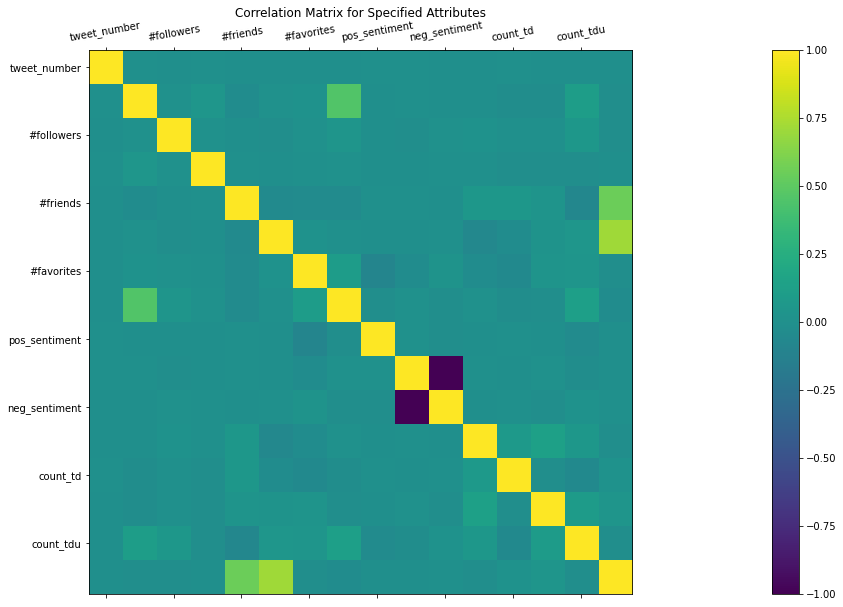

In [0]:
data_array =  np.array(pearson_corr_df.collect())
corrmatrix = data_array.tolist()
#print(corrmatrix)

def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no,figsize=(50.,10.))
    ax=fig.add_subplot(111)
    ax.set_xticklabels(['']+attr,  rotation=10)
    ax.set_yticklabels(['']+attr)
    ax.set_title("Correlation Matrix for Specified Attributes")
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(corrmatrix, columnAssembler, 234)

In [0]:
#log(x-min(x)+1) where min(x) == 1; and we are adding 1 cuz log needs positive values
#We are going to apply log transformation so the distribution becomes more aproxiamate to normal and decrease the effect of outliers.

In [0]:
#X -Xmin / Xmax - Xmin

In [0]:
#df_train_fe_tweets_date_usr = df_train_fe_tweets_date_usr.withColumn("count_1", df_train_fe_tweets_date_usr["count"].cast(IntegerType()))

In [0]:
# Normalize each Vector using $L^1$ norm.
#normalizer = Normalizer(inputCol="count_1", outputCol="normCount", p=1.0)
#l1NormData = normalizer.transform(df_train_fe_tweets_date_usr)

In [0]:
#We need to normalize the data

#feature engineering:
#User-based --> Average tweets per day (and popularity), Average tweets per day per user  and tweets per day ration
#Time-based --> is_public_holiday, is_weekend, is_noon_ is_eve, etc
#Content-based --> num_and_length_url_hashtags_mentions, contain_exclamation_or_anyNumber, average_sentiment_analysis. Finally, considere TFIDF in categorical features

<h5 style="background-color:blue;">Data Exploration</h5>

In [0]:
#It gives us most of the statistical
df_train_fe.describe().show(n=5, vertical=True, truncate = False)

-RECORD 0--------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary | count 
 username | 8151524 
 tweet_id | 8151524 
 #followers | 8151524 
 #friends | 8151524 
 #favorites | 8151524 
 entities | 8151524 
 sentiment | 8151524 
 mentions | 8133688 
 hashtags | 8148022 
 urls | 8151492 
 tweet_number | 8151524 
 pos_sentiment | 8151524 
 neg_sentiment | 8151524 
 count_td | 8151524 
 count_tdu | 8151524 
 weekend | 8151524 
 am_of_day | 8151524 
 pm_of_day | 8151524 
 number_entities | 8151524 
 number_mentions | 8151524 
 number_hashtags | 8151524 
 number_urls | 8151524 
 sentiment_overall_trinary_Score | 8151524 
-RECORD 1--------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary | mean 
 username | Infinity 
 tweet_id | 1.23094691910858112E18 
 #followers | 261608.60701324072 
 #friends | 3526.557320447072 
 #favorites | 139.8930430677748 
 entities | null 
 sentiment | null 
 mentions | Infinity 
 hashtags | NaN 
 urls | null 
 tweet_number | 41.65626807944134 
 pos_sentiment | 1.584145614979481 
 neg_sentiment | -1.6059253459843827 
 count_td | 0.5104674133334052 
 count_tdu | 0.006709147322002077 
 weekend | 0.2632166696681504 
 am_of_day | 0.4016485751621415 
 pm_of_day | 0.5983514248378585 
 number_entities | 1.7153962866330272 
 number_mentions | 1.6534649226328721 
 number_hashtags | 1.4472637263903045 
 number_urls | 0.26355979568973853 
 sentiment_overall_trinary_Score | 0.04975989765840105 
-RECORD 2--------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary | stddev 
 username | NaN 
 tweet_id | 2.1582097656992848E16 
 #followers | 2244921.8614783115 
 #friends | 20905.448866764524 
 #favorites | 2490.8446191261137 
 entities | null 
 sentiment | null 
 mentions | NaN 
 hashtags | NaN 
 urls | null 
 tweet_number | 615.3937166677746 
 pos_sentiment | 0.7543724125543625 
 neg_sentiment | 0.9794650066933943 
 count_td | 0.30617312582897743 
 count_tdu | 0.03461927185330578 
 weekend | 0.44037901660734596 
 am_of_day | 0.49023160517741854 
 pm_of_day | 0.4902316051774186 
 number_entities | 1.2343985804157782 
 number_mentions | 3.621716360795964 
 number_hashtags | 1.5072587022221537 
 number_urls | 0.46647602539441496 
 sentiment_overall_trinary_Score | 0.7395560304475699 
-RECORD 3--------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary | min 
 username | 000000e6bded7cdeaffee6928df45050 
 tweet_id | 1178791630452723712 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 entities | 0 999:0.999...:-1.1756785523149078; 
 sentiment | 1 -1 
 mentions | null;	null;
 
 hashtags | null;
 
 urls | HTTP://CRICKETSPAIN.ES/DAILY-SNIPPET-SPENDING-TIME-WITH-COVID-19-MADRID-CC-MEMBER-ASHISH-SHARMA/:-: 
 tweet_number | 0 
 pos_sentiment | 1 
 neg_sentiment | -5 
 count_td | 0.0 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 0 
 number_entities | 1 
 number_mentions | -1 
 number_hashtags | -1 
 number_urls | -2 
 sentiment_overall_trinary_Score | -1 
-RECORD 4--------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary | max 
 username | fffff6a30ab9ffe50664c02b4b10a259 
 tweet_id | 1255980188837588992 
 #followers | 116661206 
 #friends | 4486562 
 #favorites | 982198 
 entities | 蘋果日報:Apple_Daily:-1.5737627988950054;bid rigging:Bid_rigging:-1.6082139453763957;price fixing:Price_fixing:-1.6772337070073797; 
 sentiment | 5 -5 
 mentions | 🚂Follow 
 hashtags | 🧚‍♂️ 
 urls | null; 
 tweet_number | 275529 
 pos_sentiment | 5 
 neg_sentiment | -1 
 count_td | 1.0 
 count_tdu | 1.0 
 

In [0]:
# null values in each column
df_train_fe_agg = df_train_fe.agg(*[count(when(isnull(c), c)).alias(c) for c in df_train_fe.columns])
df_train_fe_agg.show(n=5, vertical=True, truncate = False)

-RECORD 0--------------------------------
 date_tweet | 0 
 username | 0 
 tweet_id | 0 
 timestamp | 0 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 entities | 0 
 sentiment | 0 
 mentions | 17836 
 hashtags | 3502 
 urls | 32 
 tweet_number | 0 
 pos_sentiment | 0 
 neg_sentiment | 0 
 count_td | 0 
 count_tdu | 0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 0 
 number_entities | 0 
 number_mentions | 0 
 number_hashtags | 0 
 number_urls | 0 
 sentiment_overall_trinary_Score | 0

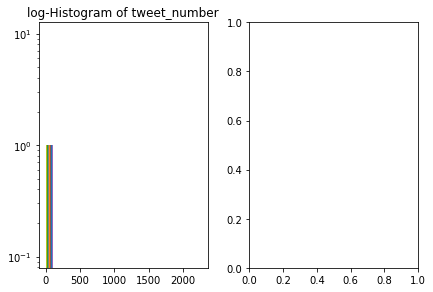

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-2219157694629354> in <module> 
 12 axes [ 0 ] . hist ( tweet_number , bins = 20 , log = True ) 
 13 axes [ 0 ] . set_title ( 'log-Histogram of tweet_number' ) 
 ---> 14 axes [ 1 ] . hist ( tweet_number_log , bins = 20 , log = False ) 
 15 axes [ 1 ] . set_title ( 'Histogram of log(tweet_number)' ) 
 16 display ( f ) 

 /databricks/python/lib/python3.8/site-packages/matplotlib/__init__.py in inner (ax, data, *args, **kwargs) 
 1563 def inner ( ax , * args , data = None , ** kwargs ) : 
 1564 if data is None : 
 -> 1565 return func ( ax , * map ( sanitize_sequence , args ) , ** kwargs ) 
 1566 
 1567 bound = new_sig . bind ( ax , * args , ** kwargs ) 

 /databricks/python/lib/python3.8/site-packages/matplotlib/axes/_axes.py in hist (self, x, bins, range, density, weights, cumulative, bottom, histtype, align, orientation, rwidth, log, color, label, stacked, **kwargs) 
 6628 # python's min/max ignore nan, 
 6629 # np.minnan returns nan for all nan input 
 -> 6630 xmin = min ( xmin , np . nanmin ( xi ) ) 
 6631 xmax = max ( xmax , np . nanmax ( xi ) ) 
 6632 # make sure we have seen at least one non-nan and finite 

 TypeError : '<' not supported between instances of 'NoneType' and 'float'

In [0]:
# histogram of tweet_number
npts = 400
df_train_fe_plot = df_train_fe.limit(num=npts)
df_train_fe_plot = df_train_fe_plot.withColumn( "tweet_number", col("tweet_number").cast("float") )
df_train_fe_plot = df_train_fe_plot.withColumn("tweet_number_log", log(col("tweet_number")).cast("float") )

tweet_number = df_train_fe_plot.select('tweet_number').take(num=npts)
tweet_number_log = df_train_fe_plot.select('tweet_number_log').take(num=npts)

f, axes = plt.subplots(1,2)
f.tight_layout()
axes[0].hist(tweet_number, bins=20, log=True)
axes[0].set_title('log-Histogram of tweet_number')
axes[1].hist(tweet_number_log, bins=20, log=False)
axes[1].set_title('Histogram of log(tweet_number)')
display(f)

In [0]:
tweet_number

Out[116]: [Row(tweet_number=23.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=34.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=3.0),
 Row(tweet_number=102.0),
 Row(tweet_number=0.0),
 Row(tweet_number=57.0),
 Row(tweet_number=106.0),
 Row(tweet_number=13.0),
 Row(tweet_number=1.0),
 Row(tweet_number=2.0),
 Row(tweet_number=2.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=2.0),
 Row(tweet_number=9.0),
 Row(tweet_number=0.0),
 Row(tweet_number=35.0),
 Row(tweet_number=0.0),
 Row(tweet_number=28.0),
 Row(tweet_number=10.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=33.0),
 Row(tweet_number=0.0),
 Row(tweet_number=3.0),
 Row(tweet_number=2.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=2.0),
 Row(tweet_number=0.0),
 Row(tweet_number=6.0),
 Row(tweet_number=49.0),
 Row(tweet_number=0.0),
 Row(tweet_number=151.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=12.0),
 Row(tweet_number=231.0),
 Row(tweet_number=0.0),
 Row(tweet_number=3.0),
 Row(tweet_number=4.0),
 Row(tweet_number=0.0),
 Row(tweet_number=90.0),
 Row(tweet_number=0.0),
 Row(tweet_number=166.0),
 Row(tweet_number=20.0),
 Row(tweet_number=13.0),
 Row(tweet_number=47.0),
 Row(tweet_number=117.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=23.0),
 Row(tweet_number=20.0),
 Row(tweet_number=0.0),
 Row(tweet_number=2.0),
 Row(tweet_number=4.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=0.0),
 Row(tweet_number=3.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=47.0),
 Row(tweet_number=1.0),
 Row(tweet_number=2.0),
 Row(tweet_number=16.0),
 Row(tweet_number=1.0),
 Row(tweet_number=106.0),
 Row(tweet_number=1.0),
 Row(tweet_number=1.0),
 Row(tweet_number=3.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=6.0),
 Row(tweet_number=0.0),
 Row(tweet_number=9.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=2.0),
 Row(tweet_number=23.0),
 Row(tweet_number=1564.0),
 Row(tweet_number=0.0),
 Row(tweet_number=30.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=98.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=7.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=1.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=2.0),
 Row(tweet_number=26.0),
 Row(tweet_number=0.0),
 Row(tweet_number=9.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=137.0),
 Row(tweet_number=0.0),
 Row(tweet_number=10.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=12.0),
 Row(tweet_number=6.0),
 Row(tweet_number=0.0),
 Row(tweet_number=193.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=44.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=14.0),
 Row(tweet_number=2256.0),
 Row(tweet_number=149.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=13.0),
 Row(tweet_number=0.0),
 Row(tweet_number=0.0),
 Row(tweet_number=92.0),
 Row(tweet_number=0.0),


In [0]:
aa = df_train_fe_plot.withColumn("tweet_number_log", log(col("tweet_number")) )
aa = df_train_fe_plot.withColumn("tweet_number_log", log(col("tweet_number_log")) )
aa.select('tweet_number_log').take(num=npts)

Out[118]: [Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.480342206790354),
 Row(tweet_number_log=1.5136524991798121),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=-0.366512917833829),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.5761461974794877),
 Row(tweet_number_log=2.0804035745815863),
 Row(tweet_number_log=1.0414115195718436),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.583198092915282),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.65766107003724),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.3266342627261163),
 Row(tweet_number_log=1.3926122423000145),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=-0.366512917833829),
 Row(tweet_number_log=1.480342206790354),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.4326183503778267),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.5015489793952992),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.4758850140111381),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.8745914093438385),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.1811431157967625),
 Row(tweet_number_log=0.09404784567046338),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.5015489793952992),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.0197814432860617),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.4758850140111381),
 Row(tweet_number_log=-0.366512917833829),
 Row(tweet_number_log=1.3247381058276892),
 Row(tweet_number_log=0.3266342627261163),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.9102351028801285),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.4758850140111381),
 Row(tweet_number_log=0.6657297833998397),
 Row(tweet_number_log=1.0971887116744008),
 Row(tweet_number_log=0.583198092915282),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.9962289113797347),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.7871950262304087),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.3266342627261163),
 Row(tweet_number_log=1.5417646001564835),
 Row(tweet_number_log=1.2036341210713388),
 Row(tweet_number_log=0.7320993708342807),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.421452649645443),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=-0.366512917833829),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.7903358922343462),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.7320993708342807),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.5495881904337927),
 Row(tweet_number_log=1.4465648265665283),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=0.8340324591347115),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.061385144184888),
 Row(tweet_number_log=1.588794296306243),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.4657368808525282),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.8406743904358902),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=None),
 Row(tweet_number_log=1.0197814432860617),
 Row(

In [0]:
df_train_fe_plot.printSchema()

root
-- date_tweet: date (nullable = true)
-- username: string (nullable = true)
-- tweet_id: long (nullable = true)
-- timestamp: timestamp (nullable = true)
-- #followers: integer (nullable = true)
-- #friends: integer (nullable = true)
-- #favorites: integer (nullable = true)
-- entities: string (nullable = true)
-- sentiment: string (nullable = true)
-- mentions: string (nullable = true)
-- hashtags: string (nullable = true)
-- urls: string (nullable = true)
-- tweet_number: float (nullable = true)
-- pos_sentiment: integer (nullable = true)
-- neg_sentiment: integer (nullable = true)
-- count_td: float (nullable = true)
-- count_tdu: float (nullable = true)
-- weekend: integer (nullable = false)
-- am_of_day: integer (nullable = false)
-- pm_of_day: integer (nullable = false)
-- number_entities: integer (nullable = false)
-- number_mentions: integer (nullable = false)
-- number_hashtags: integer (nullable = false)
-- number_urls: integer (nullable = false)
-- sentiment_overall_trinary_Score: integer (nullable = false)
-- tweet_number_log: float (nullable = true)

<h5 style="background-color:blue;">Transformers and Estimators</h5>

<h6 style="background-color:blue;">Linear Regression - The simple one</h6>
* I use only original numerical features

In [0]:
df_train_fe_num = df_train_fe.select('tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites')
df_train_fe_num = df_train_fe_num.withColumn("#followers", df_train_fe_num["#followers"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("#friends", df_train_fe_num["#friends"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("#favorites", df_train_fe_num["#favorites"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("tweet_number", df_train_fe_num["tweet_number"].cast("float"))

In [0]:
df_train_fe_num.printSchema()

root
-- tweet_number: float (nullable = true)
-- #followers: float (nullable = true)
-- #friends: float (nullable = true)
-- #favorites: float (nullable = true)

In [0]:
vecAssembler = VectorAssembler(inputCols=["#favorites", "#followers", "#friends"], outputCol="features")
lr= LinearRegression(labelCol = "tweet_number")
pipeline = Pipeline(stages=[vecAssembler, lr])

trainDF, testDF = df_train_fe_num.randomSplit([.7, .3], seed=42)
pipelineModel = pipeline.fit(trainDF)
predDF = pipelineModel.transform(testDF)
predDF.select("#favorites", "#followers", "#friends", "tweet_number", "prediction").show(5)

+----------+----------+--------+------------+-----------------+
#favorites|#followers|#friends|tweet_number| prediction|
+----------+----------+--------+------------+-----------------+
 0.0| 0.0| 0.0| 0.0|41.57583290502944|
 0.0| 0.0| 0.0| 0.0|41.57583290502944|
 0.0| 0.0| 0.0| 0.0|41.57583290502944|
 0.0| 0.0| 0.0| 0.0|41.57583290502944|
 0.0| 0.0| 0.0| 0.0|41.57583290502944|
+----------+----------+--------+------------+-----------------+
only showing top 5 rows

In [0]:
#Evaluator 
predDF = predDF.withColumn( "tweet_number", col("tweet_number").cast("float") )
evaluator = RegressionEvaluator()
evaluator.setLabelCol("tweet_number")
evaluator.setPredictionCol("prediction")
rmse_ = evaluator.evaluate(predDF, {evaluator.metricName: "rmse"})  
print(f"rmse is {rmse_}")
mse_ = evaluator.evaluate(predDF, {evaluator.metricName: "mse"})
print(f"mse is {mse_}")
r2_ = evaluator.evaluate(predDF, {evaluator.metricName: "r2"})
print(f"r2 is {r2_}")
mae_ = evaluator.evaluate(predDF, {evaluator.metricName: "mae"})
print(f"mae is {mae_}")
var_ = evaluator.evaluate(predDF, {evaluator.metricName: "var"})
print(f"var is {var_}")

rmse is 620.5461194437371
mse is 385077.6015728639
r2 is -6.455420449302807e-07
mae is 66.27810355880622
var is 0.1494072127612303

In [0]:
columnAssembler = ['tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites']

vectorAssembler = VectorAssembler().setInputCols(columnAssembler).setOutputCol('features')

lr= LinearRegression(labelCol = "tweet_number")
pipeline = Pipeline(stages=[vectorAssembler, lr])

# seed = YYYYMMDD
trainDF, testDF = df_train_fe_num.randomSplit([.7, .3], seed=20200618)
pipelineModel = pipeline.fit(trainDF)

#Saving the fitted pipeline to disk
pipelineModel.write().overwrite().save(path="dbfs:/FileStore/Data/df_train_fe.parquet/spark-lr-simplest-pipelineModel")

predDF = pipelineModel.transform(testDF)
predDF.select('tweet_number',
'#followers',
'#friends',
'#favorites', 
'prediction').show(n=5, vertical=False, truncate = False)

+------------+----------+--------+----------+---------------------+
tweet_number|#followers|#friends|#favorites|prediction |
+------------+----------+--------+----------+---------------------+
0.0 |0.0 |0.0 |0.0 |8.598479156133048E-15|
0.0 |0.0 |0.0 |0.0 |8.598479156133048E-15|
0.0 |0.0 |0.0 |0.0 |8.598479156133048E-15|
0.0 |0.0 |0.0 |0.0 |8.598479156133048E-15|
0.0 |0.0 |0.0 |0.0 |8.598479156133048E-15|
+------------+----------+--------+----------+---------------------+
only showing top 5 rows

In [0]:
#predDF.select('tweet_number',
#'#followers',
#'#friends',
#'#favorites', 
#'prediction').filter(col("#followers")> 0).show(n=100, vertical=True, truncate = False)

In [0]:
#Evaluator 
predDF = predDF.withColumn( "tweet_number", col("tweet_number").cast("float") )
evaluator = RegressionEvaluator()
evaluator.setLabelCol("tweet_number")
evaluator.setPredictionCol("prediction")
rmse_ = evaluator.evaluate(predDF, {evaluator.metricName: "rmse"})  
print(f"rmse is {rmse_}")
mse_ = evaluator.evaluate(predDF, {evaluator.metricName: "mse"})
print(f"mse is {mse_}")
r2_ = evaluator.evaluate(predDF, {evaluator.metricName: "r2"})
print(f"r2 is {r2_}")
mae_ = evaluator.evaluate(predDF, {evaluator.metricName: "mae"})
print(f"mae is {mae_}")
var_ = evaluator.evaluate(predDF, {evaluator.metricName: "var"})
print(f"var is {var_}")

rmse is 1.3863006748083933e-13
mse is 1.9218288284440248e-26
r2 is 1.0
mae is 1.4082750502346267e-14
var is 385077.4320445935

In [0]:
#define once
df_train_fe_num = df_train_fe.select('tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites',
                    'pos_sentiment',
                    'neg_sentiment',
                    'count_td',
                    'count_tdu',
                    'weekend',
                    'am_of_day',
                    'pm_of_day',
                    'number_entities',
                    'number_mentions',
                    'number_hashtags',
                    'number_urls',
                    'sentiment_overall_trinary_Score')

df_train_fe_num = df_train_fe_num.withColumn("#followers", df_train_fe_num["#followers"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("#friends", df_train_fe_num["#friends"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("#favorites", df_train_fe_num["#favorites"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("tweet_number", df_train_fe_num["tweet_number"].cast("float"))

df_train_fe_num = df_train_fe_num.withColumn("pos_sentiment", df_train_fe_num["pos_sentiment"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("neg_sentiment", df_train_fe_num["neg_sentiment"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("count_td", df_train_fe_num["count_td"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("count_tdu", df_train_fe_num["count_tdu"].cast("float"))

df_train_fe_num = df_train_fe_num.withColumn("weekend", df_train_fe_num["weekend"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("am_of_day", df_train_fe_num["am_of_day"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("pm_of_day", df_train_fe_num["pm_of_day"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("number_entities", df_train_fe_num["number_entities"].cast("float"))

df_train_fe_num = df_train_fe_num.withColumn("number_mentions", df_train_fe_num["number_mentions"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("number_hashtags", df_train_fe_num["number_hashtags"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("number_urls", df_train_fe_num["number_urls"].cast("float"))
df_train_fe_num = df_train_fe_num.withColumn("sentiment_overall_trinary_Score", df_train_fe_num["sentiment_overall_trinary_Score"].cast("float"))


In [0]:
df_train_fe_num.printSchema()

root
-- tweet_number: float (nullable = true)
-- #followers: float (nullable = true)
-- #friends: float (nullable = true)
-- #favorites: float (nullable = true)
-- pos_sentiment: float (nullable = true)
-- neg_sentiment: float (nullable = true)
-- count_td: float (nullable = true)
-- count_tdu: float (nullable = true)
-- weekend: float (nullable = false)
-- am_of_day: float (nullable = false)
-- pm_of_day: float (nullable = false)
-- number_entities: float (nullable = false)
-- number_mentions: float (nullable = false)
-- number_hashtags: float (nullable = false)
-- number_urls: float (nullable = false)
-- sentiment_overall_trinary_Score: float (nullable = false)

<h6 style="background-color:blue;">Linear Regression without Regularization</h6>
* I use all numerical features, including feature engineered features

In [0]:
columnAssembler = ['tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites',
                    'pos_sentiment',
                    'neg_sentiment',
                    'count_td',
                    'count_tdu',
                    'weekend',
                    'am_of_day',
                    'pm_of_day',
                    'number_entities',
                    'number_mentions',
                    'number_hashtags',
                    'number_urls',
                    'sentiment_overall_trinary_Score']

vectorAssembler = VectorAssembler().setInputCols(columnAssembler).setOutputCol('features')

#Param

niter = 500        # set by trial and error
reg = 0.0          # no regularization for now
elastic_reg = 0.0  # secondary regularization parameter (ratio of L1 to L2 regularization penalties)
tolerance = 1e-5   # set by trial and error
intercept = True   # why not indeed

lr= LinearRegression(labelCol = "tweet_number", \
                          maxIter=niter, \
                          regParam=reg, \
                          elasticNetParam=elastic_reg, \
                          tol=tolerance)
pipeline = Pipeline(stages=[vectorAssembler, lr])

# seed = YYYYMMDD
trainDF, testDF = df_train_fe_num.randomSplit([.7, .3], seed=20200618)
pipelineModel = pipeline.fit(trainDF)

#Saving the fitted pipeline to disk
pipelineModel.write().overwrite().save(path="dbfs:/FileStore/Data/df_train_fe.parquet/spark-lr-noreg-pipelineModel")

predDF = pipelineModel.transform(testDF)
predDF.select('tweet_number',
'#followers',
'#friends',
'#favorites',
'pos_sentiment',
'neg_sentiment',
'count_td',
'count_tdu',
'weekend',
'am_of_day',
'pm_of_day',
'number_entities',
'number_mentions',
'number_hashtags',
'number_urls', 
'prediction').show(n=5, vertical=True, truncate = False)

-RECORD 0-----------------------
 tweet_number | 0 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -5 
 count_td | 0.1584167 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 1 
 pm_of_day | 0 
 number_entities | 1 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.0 
-RECORD 1-----------------------
 tweet_number | 0 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -4 
 count_td | 0.13483974 
 count_tdu | 0.0056179776 
 weekend | 1 
 am_of_day | 1 
 pm_of_day | 0 
 number_entities | 3 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.0 
-RECORD 2-----------------------
 tweet_number | 0 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -4 
 count_td | 0.1463497 
 count_tdu | 0.0 
 weekend | 1 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 1 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.0 
-RECORD 3-----------------------
 tweet_number | 0 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -4 
 count_td | 0.7478875 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 2 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.0 
-RECORD 4-----------------------
 tweet_number | 0 
 #followers | 0 
 #friends | 0 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -3 
 count_td | 0.024369385 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 3 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.0 
only showing top 5 rows

In [0]:
#Evaluator 
predDF = predDF.withColumn( "tweet_number", col("tweet_number").cast("float") )
evaluator = RegressionEvaluator()
evaluator.setLabelCol("tweet_number")
evaluator.setPredictionCol("prediction")
rmse_ = evaluator.evaluate(predDF, {evaluator.metricName: "rmse"})  
print(f"rmse is {rmse_}")
mse_ = evaluator.evaluate(predDF, {evaluator.metricName: "mse"})
print(f"mse is {mse_}")
r2_ = evaluator.evaluate(predDF, {evaluator.metricName: "r2"})
print(f"r2 is {r2_}")
mae_ = evaluator.evaluate(predDF, {evaluator.metricName: "mae"})
print(f"mae is {mae_}")
var_ = evaluator.evaluate(predDF, {evaluator.metricName: "var"})
print(f"var is {var_}")

0.0
0.0
1.0
0.0
334201.41375831777

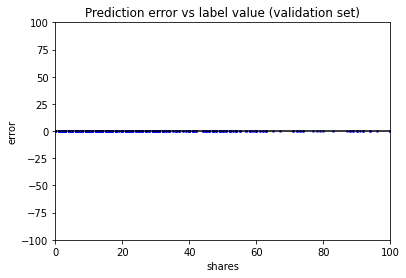

In [0]:
# scatter plot of errors by baseline and regression model
npts = 2000
labels_preds = predDF.select('tweet_number', 'prediction').take(npts)
#base_pred = trainVal_withPreds_base_df.select('prediction').first()[0]

truth = [labpred['tweet_number'] for labpred in labels_preds]
reg_err = [labpred['prediction']-labpred['tweet_number'] for labpred in labels_preds]
#base_err = [base_pred-labpred['label'] for labpred in labels_preds]

f = plt.figure()
#plot_base = plt.scatter(truth,base_err,s=8,c='red',linewidth=0,alpha=0.7)
plot_reg = plt.scatter(truth,reg_err,s=8,c='blue',linewidth=0,alpha=0.7)
plt.plot((0,100),(0,0),lineStyle='-',c='black')
plt.xlim((0,100))
plt.ylim((-100,100))
plt.xlabel('shares')
plt.ylabel('error')
#plt.legend((plot_base,plot_reg),('baseline','regression'))
plt.title('Prediction error vs label value (validation set)')
display(f)

<h6 style="background-color:blue;">Linear Regression with Regularization</h6>
* I use all numerical features, including feature engineered features

In [0]:
columnAssembler = ['tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites',
                    'pos_sentiment',
                    'neg_sentiment',
                    'count_td',
                    'count_tdu',
                    'weekend',
                    'am_of_day',
                    'pm_of_day',
                    'number_entities',
                    'number_mentions',
                    'number_hashtags',
                    'number_urls',
                    'sentiment_overall_trinary_Score']

vectorAssembler = VectorAssembler().setInputCols(columnAssembler).setOutputCol('features')

#Param

niter = 500        # set by trial and error
reg = 0.2          # set by trial and error
elastic_reg = 0.8  # set by trial and error
tolerance = 1e-5   # set by trial and error
intercept = True   # why not indeed

lr= LinearRegression(labelCol = "tweet_number", \
                          maxIter=niter, \
                          regParam=reg, \
                          elasticNetParam=elastic_reg, \
                          tol=tolerance)
pipeline = Pipeline(stages=[vectorAssembler, lr])

# seed = YYYYMMDD
trainDF, testDF = df_train_fe_num.randomSplit([.7, .3], seed=20200618)
pipelineModel = pipeline.fit(trainDF)

#Saving the fitted pipeline to disk
pipelineModel.write().overwrite().save(path="dbfs:/FileStore/Data/df_train_fe.parquet/spark-lr-reg-pipelineModel")

predDF = pipelineModel.transform(testDF)
predDF.select('tweet_number',
'#followers',
'#friends',
'#favorites',
'pos_sentiment',
'neg_sentiment',
'count_td',
'count_tdu',
'weekend',
'am_of_day',
'pm_of_day',
'number_entities',
'number_mentions',
'number_hashtags',
'number_urls', 
'prediction').show(n=5, vertical=True, truncate = False)

-RECORD 0-------------------------------
 tweet_number | 0 
 #followers | 48 
 #friends | 40 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -4 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 1 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.013871177613089826 
-RECORD 1-------------------------------
 tweet_number | 0 
 #followers | 3 
 #friends | 167 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -1 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 1 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 1 
 prediction | 0.013871177613089826 
-RECORD 2-------------------------------
 tweet_number | 0 
 #followers | 1074 
 #friends | 2770 
 #favorites | 0 
 pos_sentiment | 2 
 neg_sentiment | -3 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 4 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 0.013871177613089826 
-RECORD 3-------------------------------
 tweet_number | 0 
 #followers | 0 
 #friends | 8 
 #favorites | 0 
 pos_sentiment | 3 
 neg_sentiment | -1 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 1 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 1 
 prediction | 0.013871177613089826 
-RECORD 4-------------------------------
 tweet_number | 8 
 #followers | 2030 
 #friends | 1067 
 #favorites | 0 
 pos_sentiment | 1 
 neg_sentiment | -1 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0 
 am_of_day | 0 
 pm_of_day | 1 
 number_entities | 1 
 number_mentions | 1 
 number_hashtags | 1 
 number_urls | 0 
 prediction | 8.011213263182313 
only showing top 5 rows

In [0]:
#Evaluator 
predDF = predDF.withColumn( "tweet_number", col("tweet_number").cast("float") )
evaluator = RegressionEvaluator()
evaluator.setLabelCol("tweet_number")
evaluator.setPredictionCol("prediction")
rmse_ = evaluator.evaluate(predDF, {evaluator.metricName: "rmse"})  
print(f"rmse is {rmse_}")
mse_ = evaluator.evaluate(predDF, {evaluator.metricName: "mse"})
print(f"mse is {mse_}")
r2_ = evaluator.evaluate(predDF, {evaluator.metricName: "r2"})
print(f"r2 is {r2_}")
mae_ = evaluator.evaluate(predDF, {evaluator.metricName: "mae"})
print(f"mae is {mae_}")
var_ = evaluator.evaluate(predDF, {evaluator.metricName: "var"})
print(f"var is {var_}")

0.2001332242150449
0.042455567091444796
0.999999889617045
0.02198714076591583
393119.83754868334

<h6 style="background-color:blue;">Linear Regression without Regularization and basic features and 100 iterations</h6>
* I used just the basic features (not including feature engineered features) and default params
* Prevent overfitting

In [0]:
# Preparing VectorAssembler
df_train_fe_num_cv = df_train_fe_num

columnAssembler = ['tweet_number',
                    '#followers',
                    '#friends',
                    '#favorites',
                    'pos_sentiment',
                    'neg_sentiment',
                    'count_td',
                    'count_tdu',
                    'weekend',
                    'am_of_day',
                    'pm_of_day',
                    'number_entities',
                    'number_mentions',
                    'number_hashtags',
                    'number_urls',
                    'sentiment_overall_trinary_Score']

vectorAssembler = VectorAssembler().setInputCols(columnAssembler).setOutputCol('features')

df_train_fe_num_assembler = vectorAssembler.transform(df_train_fe_num_cv)


In [0]:
df_train_fe_num_assembler.show(n=5, vertical=True, truncate = False)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------
 tweet_number | 0.0 
 #followers | 48.0 
 #friends | 40.0 
 #favorites | 0.0 
 pos_sentiment | 1.0 
 neg_sentiment | -4.0 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0.0 
 am_of_day | 0.0 
 pm_of_day | 1.0 
 number_entities | 1.0 
 number_mentions | 1.0 
 number_hashtags | 1.0 
 number_urls | 0.0 
 sentiment_overall_trinary_Score | -1.0 
 features | [0.0,48.0,40.0,0.0,1.0,-4.0,0.0064022596925497055,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-1.0] 
-RECORD 1---------------------------------------------------------------------------------------------------------------------------
 tweet_number | 0.0 
 #followers | 1169.0 
 #friends | 552.0 
 #favorites | 0.0 
 pos_sentiment | 1.0 
 neg_sentiment | -4.0 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0.0 
 am_of_day | 0.0 
 pm_of_day | 1.0 
 number_entities | 1.0 
 number_mentions | 1.0 
 number_hashtags | 1.0 
 number_urls | 0.0 
 sentiment_overall_trinary_Score | -1.0 
 features | [0.0,1169.0,552.0,0.0,1.0,-4.0,0.0064022596925497055,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-1.0] 
-RECORD 2---------------------------------------------------------------------------------------------------------------------------
 tweet_number | 13.0 
 #followers | 522929.0 
 #friends | 79592.0 
 #favorites | 154.0 
 pos_sentiment | 2.0 
 neg_sentiment | -1.0 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0.0 
 am_of_day | 0.0 
 pm_of_day | 1.0 
 number_entities | 1.0 
 number_mentions | 2.0 
 number_hashtags | 1.0 
 number_urls | 0.0 
 sentiment_overall_trinary_Score | 1.0 
 features | [13.0,522929.0,79592.0,154.0,2.0,-1.0,0.0064022596925497055,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0] 
-RECORD 3---------------------------------------------------------------------------------------------------------------------------
 tweet_number | 0.0 
 #followers | 82267.0 
 #friends | 1339.0 
 #favorites | 84.0 
 pos_sentiment | 1.0 
 neg_sentiment | -4.0 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0.0 
 am_of_day | 0.0 
 pm_of_day | 1.0 
 number_entities | 1.0 
 number_mentions | 1.0 
 number_hashtags | 1.0 
 number_urls | 0.0 
 sentiment_overall_trinary_Score | -1.0 
 features | [0.0,82267.0,1339.0,84.0,1.0,-4.0,0.0064022596925497055,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-1.0] 
-RECORD 4---------------------------------------------------------------------------------------------------------------------------
 tweet_number | 10.0 
 #followers | 19703.0 
 #friends | 1210.0 
 #favorites | 5.0 
 pos_sentiment | 1.0 
 neg_sentiment | -4.0 
 count_td | 0.0064022597 
 count_tdu | 0.0 
 weekend | 0.0 
 am_of_day | 0.0 
 pm_of_day | 1.0 
 number_entities | 1.0 
 number_mentions | 1.0 
 number_hashtags | 1.0 
 number_urls | 1.0 
 sentiment_overall_trinary_Score | -1.0 
 features | [10.0,19703.0,1210.0,5.0,1.0,-4.0,0.0064022596925497055,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-1.0] 
only showing top 5 rows

In [0]:
# Create initial LinearRegression model
lr = LinearRegression(labelCol="tweet_number", featuresCol="features")


# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

# Evaluate model
lrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="tweet_number", metricName="rmse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 5)

#Splitting DataFrame
# seed = YYYYMMDD
trainDF, testDF = df_train_fe_num_assembler.randomSplit([.7, .3], seed=20200618)

# Run cross validations
lrcvModel = lrcv.fit(trainDF)
print(lrcvModel)

#Saving the fitted pipeline to disk
pipelineModel.write().overwrite().save(path="dbfs:/FileStore/Data/df_train_fe.parquet/spark-lrcvModel")

# Get Model Summary Statistics
lrcvSummary = lrcvModel.bestModel.summary


CrossValidatorModel_c45bcce23e39

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-1126484167416276> in <module> 
 32 # Get Model Summary Statistics 
 33 lrcvSummary = lrcvModel . bestModel . summary
 ---> 34 print ( "Coefficient Standard Errors: " + str ( lrcvSummary . coefficientStandardErrors ) ) 
 35 print ( "P Values: " + str ( lrcvSummary . pValues ) ) # Last element is the intercept 
 36 

 /databricks/spark/python/pyspark/ml/regression.py in coefficientStandardErrors (self) 
 566 LinearRegression . solver
 567 """
 --> 568 return self . _call_java ( "coefficientStandardErrors" ) 
 569 
 570 @ property

 /databricks/spark/python/pyspark/ml/wrapper.py in _call_java (self, name, *args) 
 52 sc = SparkContext . _active_spark_context
 53 java_args = [ _py2java ( sc , arg ) for arg in args ] 
 ---> 54 return _java2py ( sc , m ( * java_args ) ) 
 55 
 56 @ staticmethod

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 108 def deco ( * a , ** kw ) : 
 109 try : 
 --> 110 return f ( * a , ** kw ) 
 111 except py4j . protocol . Py4JJavaError as e : 
 112 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling o291549.coefficientStandardErrors.
: java.lang.UnsupportedOperationException: No Std. Error of coefficients available for this LinearRegressionModel
	at org.apache.spark.ml.regression.LinearRegressionSummary.coefficientStandardErrors$lzycompute(LinearRegression.scala:1017)
	at org.apache.spark.ml.regression.LinearRegressionSummary.coefficientStandardErrors(LinearRegression.scala:1014)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:
#print("Coefficient Standard Errors: " + str(lrcvSummary coefficientStandardErrors))
# java.lang.UnsupportedOperationException: No Std. Error of coefficients available for this LinearRegressionModel
#print("P Values: " + str(lrcvSummary.pValues)) # Last element is the intercept

# Use test set here so we can measure the accuracy of our model on new data
lrpredictions = lrcvModel.transform(testDF)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('RMSE:', lrevaluator.evaluate(lrpredictions))

RMSE: 0.0009366153980619339

In [0]:
#Evaluator 
#predDF = predDF.withColumn( "tweet_number", col("tweet_number").cast("float") )
evaluator = RegressionEvaluator()
evaluator.setLabelCol("tweet_number")
evaluator.setPredictionCol("prediction")
rmse_ = evaluator.evaluate(lrpredictions, {evaluator.metricName: "rmse"})  
print(f"rmse is {rmse_}")
mse_ = evaluator.evaluate(lrpredictions, {evaluator.metricName: "mse"})
print(f"mse is {mse_}")
r2_ = evaluator.evaluate(lrpredictions, {evaluator.metricName: "r2"})
print(f"r2 is {r2_}")
mae_ = evaluator.evaluate(lrpredictions, {evaluator.metricName: "mae"})
print(f"mae is {mae_}")
var_ = evaluator.evaluate(lrpredictions, {evaluator.metricName: "var"})
print(f"var is {var_}")

rmse is 0.0009935446506741052
mse is 9.699105376446963e-07
r2 is 0.9999999999974555
mae is 0.00010646833212343287
var is 400247.27710177685